# Credit card Limit 

We have credit card data of the customers in the csv format.Our challenge here is a increasing defaulters. This leads to think over the credit limit per customers & find what are the optimal credit limit per customers. We should look into the data & find out what all we can do to ensure less number of defaulters 

In [1]:
#DS Basics
import pandas as pd
import numpy as np
import matplotlib as mpl
#interactive decision tree
import matplotlib.pyplot as plt
#helpers
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#profiling
import pandas_profiling
from pandas_profiling import ProfileReport

In [3]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [5]:
mpl.rcParams['figure.figsize'] = (9,9)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [9]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE

# Getting the data & understanding

In [45]:
credit = pd.read_csv("default of credit card clients.csv", header=1) 

Header =1, chose row 1 as the header from the excel sheet

In [46]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

From the above it is understood sex, education & default are non-numeric. Since we are working on python we need to convert them to numeric. This case will be different if we are working on R.

In [47]:
credit.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...     BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  ...  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   ...  4.701315e+04   43262.948967   40311.400967   38871.760400   
std    ...  6.934939e+04   64332.856134   60797.155770   59554.107537   
min    ... -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    ...  2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    ...  2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    ...  6.016475e+04   54506.000000   50190.500000   49198.250000   
max    ...  1.664089e+06  891586.000000  927171.000000  961664.000000   

            PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000  

[8 rows x 22 columns]

The avergae age of the customers is 35. 

In [48]:
credit['default'] = credit['default payment next month']

Let's rename the column "default payment next month" with "default". The above would add an additional column. We can drop "default payment next month"

In [49]:
credit.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0     -1  ...          0          0         0       689         0         0   
1      0  ...       3455       3261         0      1000      1000      1000   
2      0  ...      14948      15549      1518      1500      1000      1000   
3      0  ...      28959      29547      2000      2019      1200      1100   
4      0  ...      19146      19131      2000     36681     10000      9000   

   PAY_AMT5  PAY_AMT6  default payment next month      default  
0         0         0                     default      default  
1         0      2000                     default      default  
2      1000      5000                 not default  not default  
3      1069      1000                 not default  not default  
4       689       679                 not default  not default  

[5 rows x 26 columns]

Preprocessing

In [50]:
credit = credit.drop(['ID','default payment next month'], axis=1)
#overriding data set with the same data set after removing duplicate 
credit = credit.drop_duplicates()
print(credit.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [51]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

Converting non-numeric to numeric

Converting Sex & default using label encoder

In [52]:
# To encode the the col... lets say to convert the non-numeric
# to numeric u can use this
#Label encoding
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])
credit['default']

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default, Length: 29965, dtype: int32

In [53]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [54]:
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX_list'] = le.transform(credit['SEX'])
# credit['SEX_list']

But for the purpose of EDA, I would alos like to map the values within the same column. 

In [55]:
convertedCol = credit.loc[:,'EDUCATION'] # selecting the required cols
convertedCol

0         university
1         university
2         university
3         university
4         university
            ...     
29995    high school
29996    high school
29997     university
29998    high school
29999     university
Name: EDUCATION, Length: 29965, dtype: object

Lets do one hot encode eduaction using_dummies, which will intern create dummy features after the process called dummification. Note for the purpose of modelling we can one hot encoding on the feature education

Use mapping function to convert education into numeric 

In [56]:
credit['Edu_list'] = credit.EDUCATION.map({'other':0,'graduate school':1,'university':2,'high school':3})
credit.head()

LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000  female  university         1   24      2      2     -1     -1   
1     120000  female  university         2   26     -1      2      0      0   
2      90000  female  university         2   34      0      0      0      0   
3      50000  female  university         1   37      0      0      0      0   
4      50000    male  university         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -2  ...          0         0       689         0         0         0   
1      0  ...       3261         0      1000      1000      1000         0   
2      0  ...      15549      1518      1500      1000      1000      1000   
3      0  ...      29547      2000      2019      1200      1100      1069   
4      0  ...      19131      2000     36681     10000      9000       689   

   PAY_AMT6  default  SEX_list  Edu_list  
0         0        0         0         2  
1      2000        0         0         2  
2      5000        1         0         2  
3      1000        1         0         2  
4       679        1         1         2  

[5 rows x 26 columns]

In [57]:
credit.describe()

LIMIT_BAL      MARRIAGE           AGE         PAY_0         PAY_2  \
count    29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
mean    167442.005006      1.551877     35.487969     -0.016753     -0.131854   
std     129760.135222      0.521997      9.219459      1.123492      1.196322   
min      10000.000000      0.000000     21.000000     -2.000000     -2.000000   
25%      50000.000000      1.000000     28.000000     -1.000000     -1.000000   
50%     140000.000000      2.000000     34.000000      0.000000      0.000000   
75%     240000.000000      2.000000     41.000000      0.000000      0.000000   
max    1000000.000000      3.000000     79.000000      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6      BILL_AMT1  \
count  29965.000000  29965.000000  29965.000000  29965.000000   29965.000000   
mean      -0.164392     -0.218922     -0.264509     -0.289438   51283.009778   
std        1.195878      1.168175      1.132220      1.149090   73658.132403   
min       -2.000000     -2.000000     -2.000000     -2.000000 -165580.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000    3595.000000   
50%        0.000000      0.000000      0.000000      0.000000   22438.000000   
75%        0.000000      0.000000      0.000000      0.000000   67260.000000   
max        8.000000      8.000000      8.000000      8.000000  964511.000000   

       ...      BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count  ...   29965.000000   29965.000000  2.996500e+04   29965.000000   
mean   ...   38917.012281    5670.099316  5.927983e+03    5231.688837   
std    ...   59574.147742   16571.849467  2.305346e+04   17616.361124   
min    ... -339603.000000       0.000000  0.000000e+00       0.000000   
25%    ...    1262.000000    1000.000000  8.500000e+02     390.000000   
50%    ...   17124.000000    2102.000000  2.010000e+03    1804.000000   
75%    ...   49252.000000    5008.000000  5.000000e+03    4512.000000   
max    ...  961664.000000  873552.000000  1.684259e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6       default  \
count   29965.000000   29965.000000   29965.000000  29965.000000   
mean     4831.617454    4804.897047    5221.498014      0.778742   
std     15674.464538   15286.372298   17786.976864      0.415101   
min         0.000000       0.000000       0.000000      0.000000   
25%       300.000000     261.000000     131.000000      1.000000   
50%      1500.000000    1500.000000    1500.000000      1.000000   
75%      4016.000000    4042.000000    4000.000000      1.000000   
max    621000.000000  426529.000000  528666.000000      1.000000   

           SEX_list      Edu_list  
count  29965.000000  29965.000000  
mean       0.396262      1.780277  
std        0.489128      0.728525  
min        0.000000      0.000000  
25%        0.000000      1.000000  
50%        0.000000      2.000000  
75%        1.000000      2.000000  
max        1.000000      3.000000  

[8 rows x 24 columns]

For the purpose of modeling, lets divide the Age,bill amount & payment into bins on credit data set

EqualFrequencyDiscretiser is good while dividing into bins. But it rename the column into bin numbers. So for the ease of visualizations let us divide bins in credit using .cut & .qcut

In [58]:
credit['AGE_bin']= pd.qcut(credit['AGE'], q=4)
bin_labels_age = ['21-28','29-34','35-41','42-79']
bin_labels_price = ['-50000','-20000','0','20000','50000','80000','100000','200000','300000','500000','800000','1100000']
credit['BILL_AMT3_bin'] = pd.cut(credit['BILL_AMT3'], bins=[-80000,-50000,-20000,0,20000,50000,80000,100000,200000,300000,500000,800000,1100000],labels= bin_labels_price)
credit['PAY_AMT3_bin'] = pd.cut(credit['PAY_AMT3'], bins=[-80000,-50000,-20000,0,20000,50000,80000,100000,200000,300000,500000,800000,1100000],labels= bin_labels_price)
credit['BILL_AMT2_bin'] = pd.cut(credit['BILL_AMT2'], bins=[-80000,-50000,-20000,0,20000,50000,80000,100000,200000,300000,500000,800000,1100000],labels= bin_labels_price)
credit['PAY_AMT2_bin'] = pd.cut(credit['PAY_AMT2'], bins=[-80000,-50000,-20000,0,20000,50000,80000,100000,200000,300000,500000,800000,1100000],labels= bin_labels_price)

credit['LIMIT_BAL_bin'] = pd.cut(credit['LIMIT_BAL'], bins=[-80000,-50000,-20000,0,20000,50000,80000,100000,200000,300000,500000,800000,1100000],labels= bin_labels_price)

# credit.head()

To look into the deafult customers, we create a seperate data set with only the deafault cuatomers

In [82]:
default_table = credit.loc[credit['default']==0]
default_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6630 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LIMIT_BAL      6630 non-null   int64   
 1   SEX            6630 non-null   object  
 2   EDUCATION      6630 non-null   object  
 3   MARRIAGE       6630 non-null   int64   
 4   AGE            6630 non-null   int64   
 5   PAY_0          6630 non-null   int64   
 6   PAY_2          6630 non-null   int64   
 7   PAY_3          6630 non-null   int64   
 8   PAY_4          6630 non-null   int64   
 9   PAY_5          6630 non-null   int64   
 10  PAY_6          6630 non-null   int64   
 11  BILL_AMT1      6630 non-null   int64   
 12  BILL_AMT2      6630 non-null   int64   
 13  BILL_AMT3      6630 non-null   int64   
 14  BILL_AMT4      6630 non-null   int64   
 15  BILL_AMT5      6630 non-null   int64   
 16  BILL_AMT6      6630 non-null   int64   
 17  PAY_AMT1       6630 non-null   i

In [60]:
credit_samples = credit.sample(800)

# Let's dive into EDA

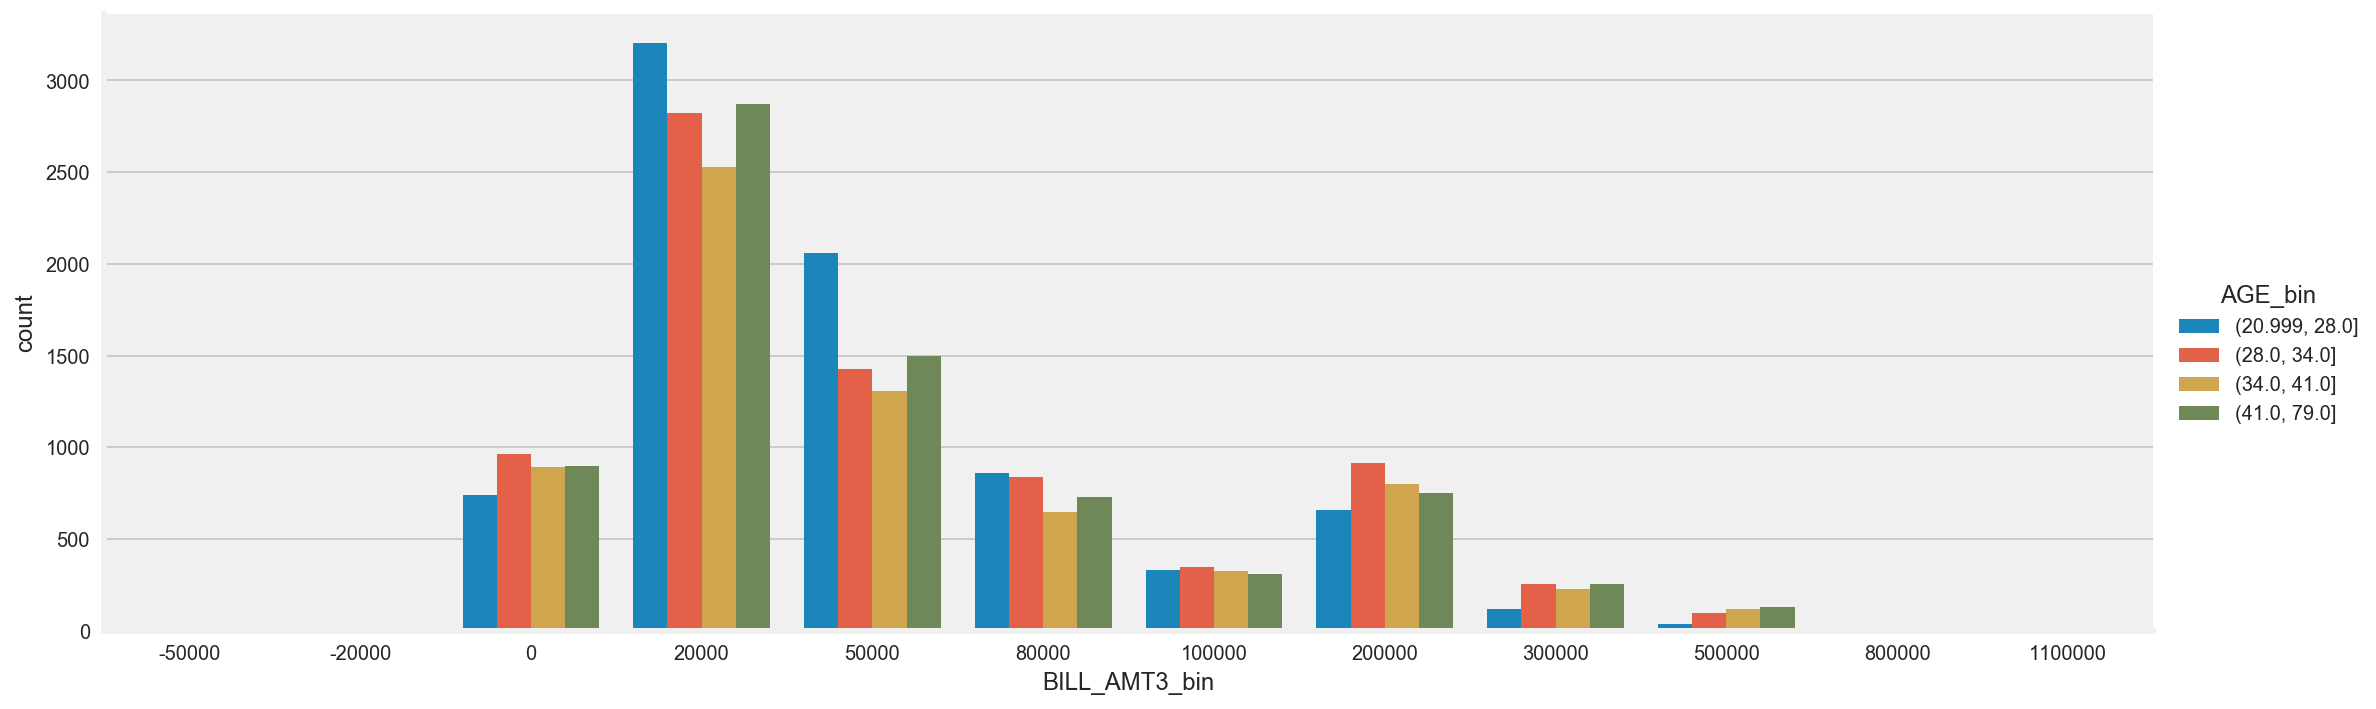

In [30]:
fig1 = sns.catplot('BILL_AMT3_bin', data = credit, hue = 'AGE_bin', kind='count', aspect=3,height=5)
# fig1.

In [72]:
ProfileReport(credit)

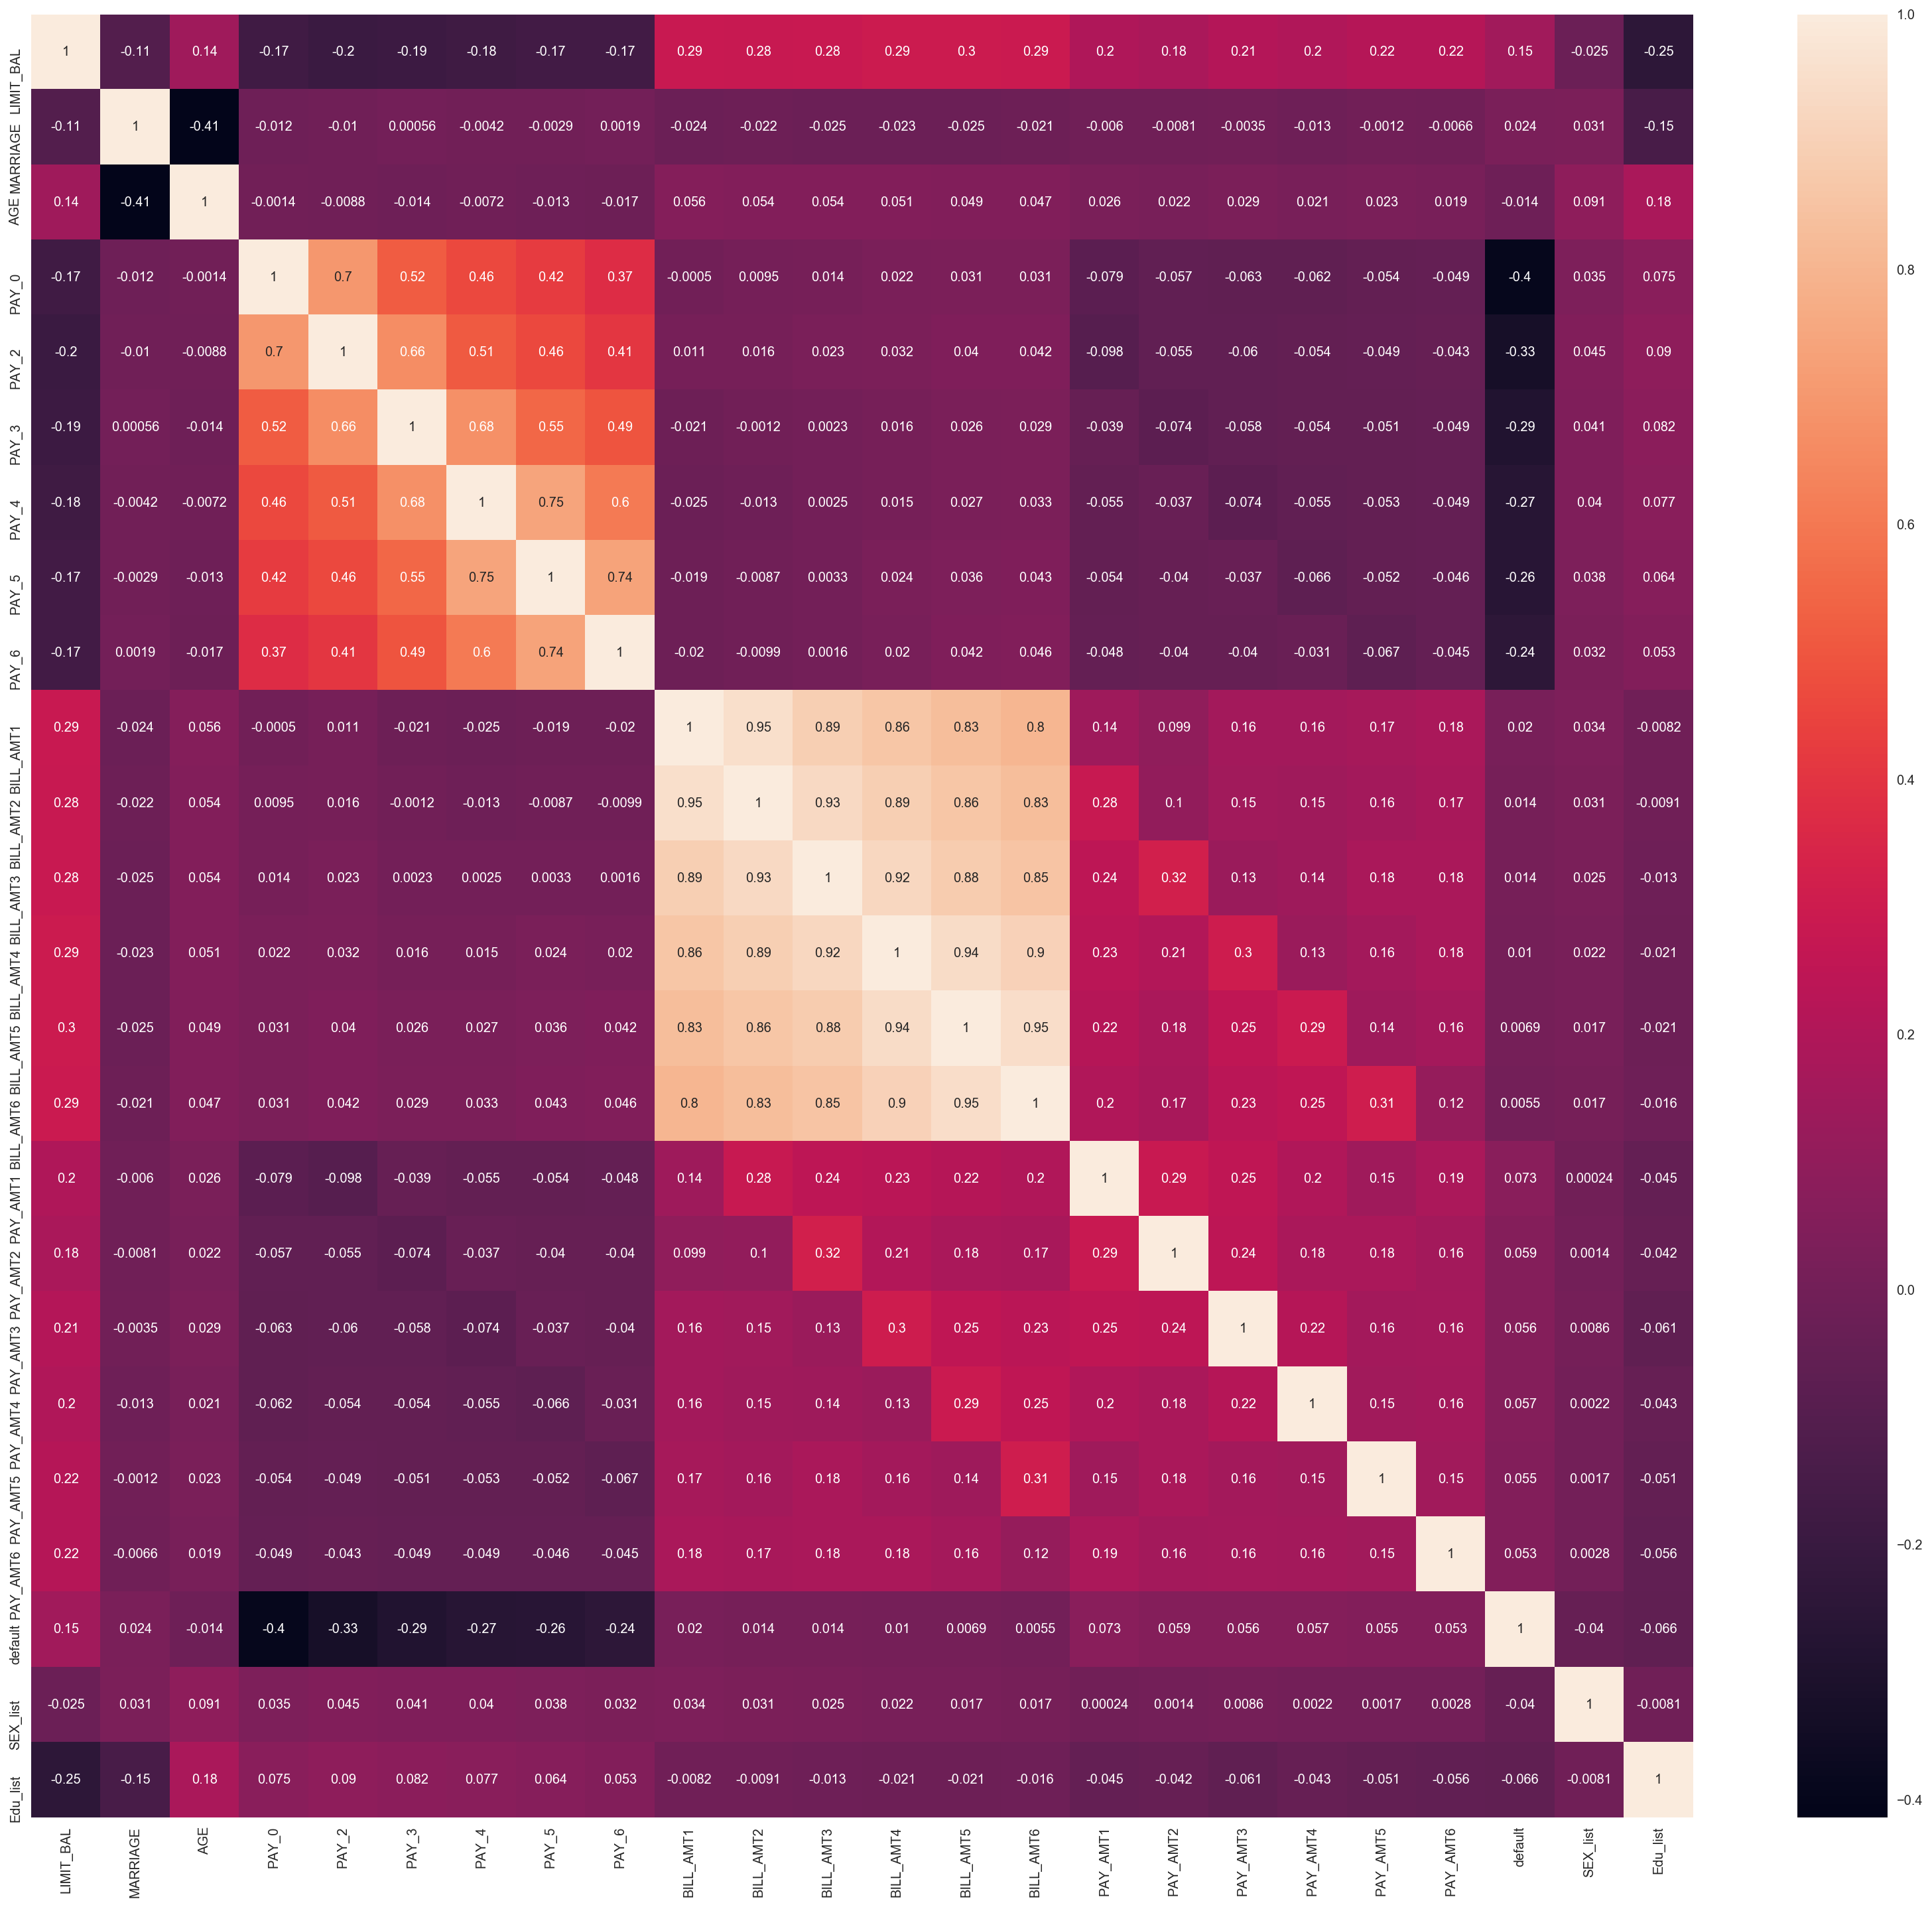

In [31]:
credit_corr = credit.corr()
plt.figure(figsize =(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

There is a high correlation between each Payment methods & each bill amount. So if we feed them all there is chances of multicollenarity.Pay0- PAY6, SEX, Marriage & education (except grad school) have low correlation

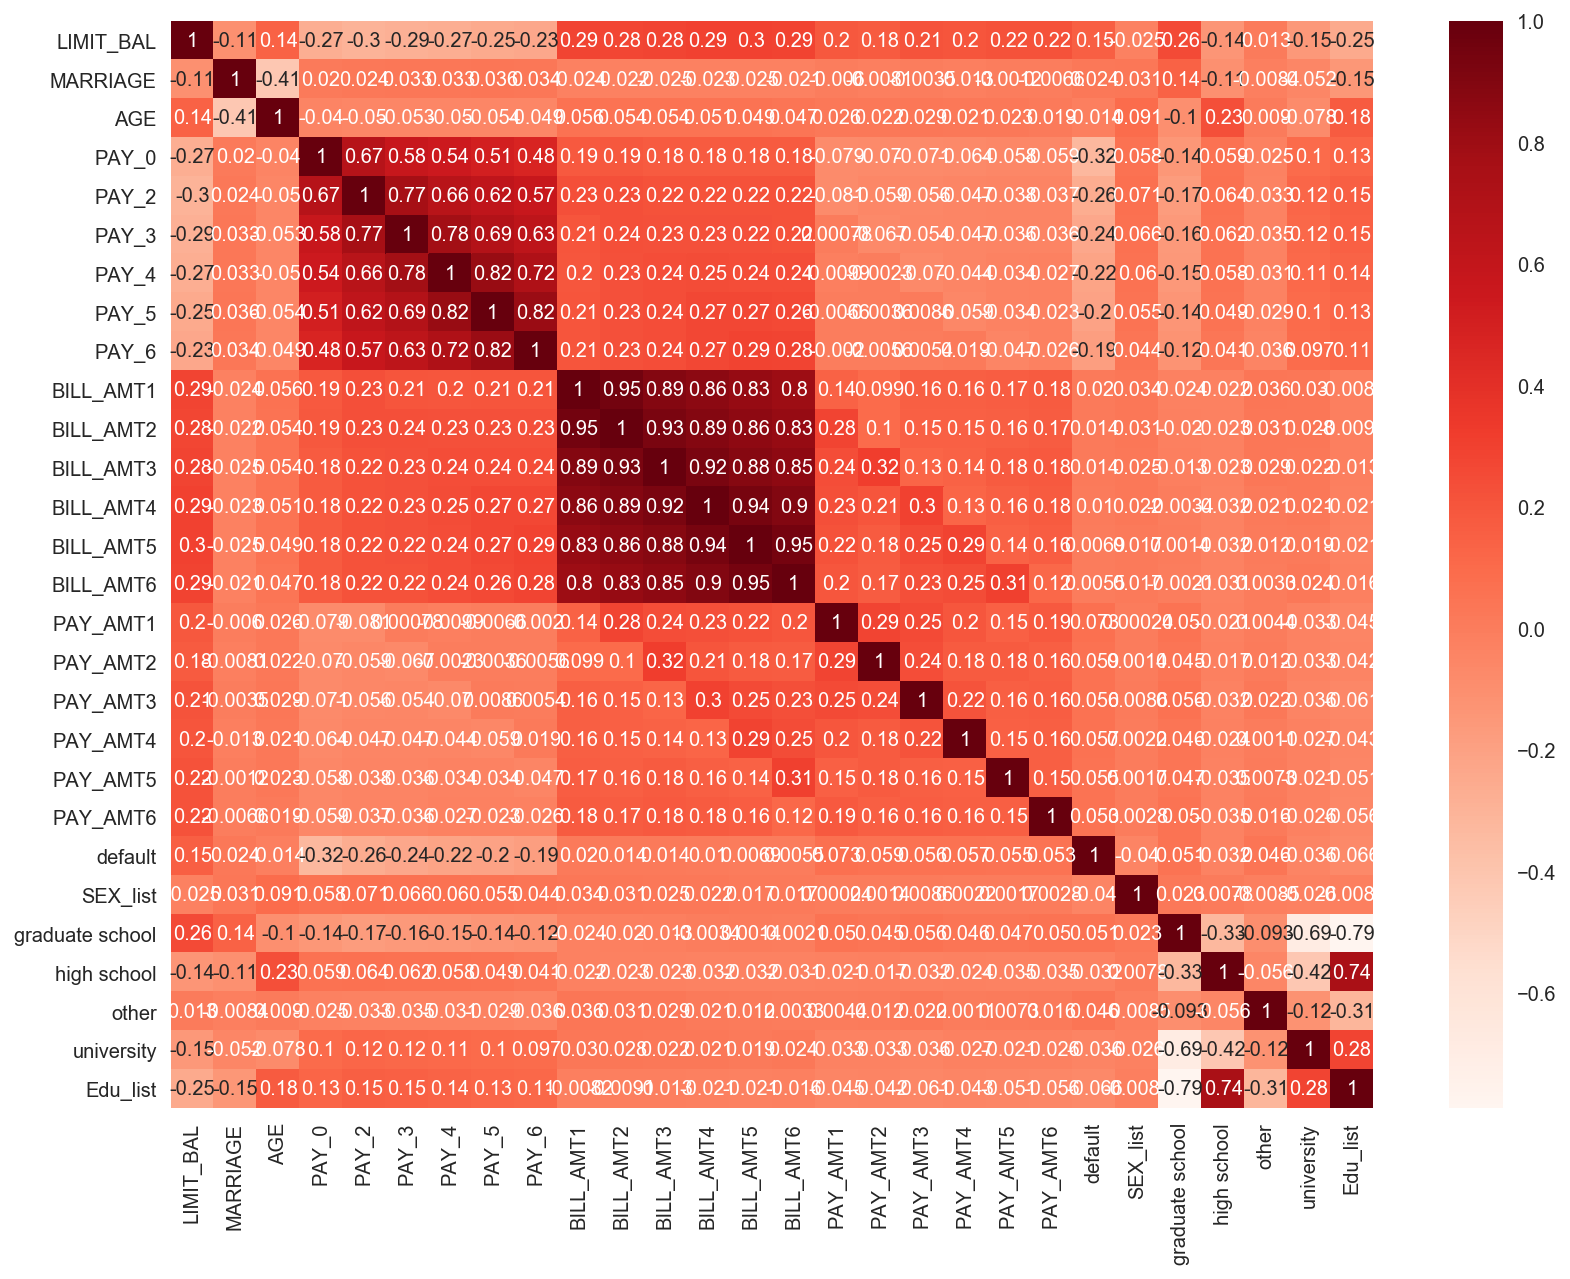

In [74]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
credit_corr = credit.corr()
sns.heatmap(credit_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Text(0.5, 1.0, 'Box plot : AGE')

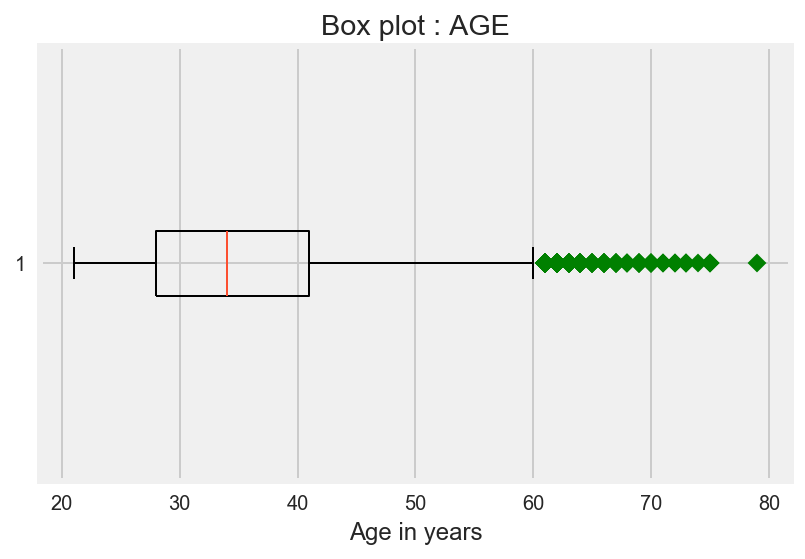

In [32]:
plt.boxplot(credit['AGE'],0,'gD',vert= False)
plt.xlabel('Age in years')
plt.title('Box plot : AGE')

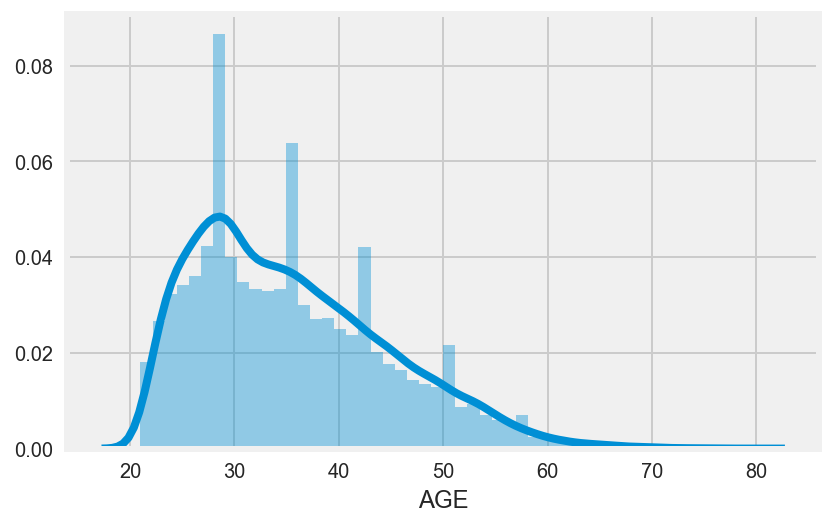

In [33]:
sns.distplot(credit['AGE'])

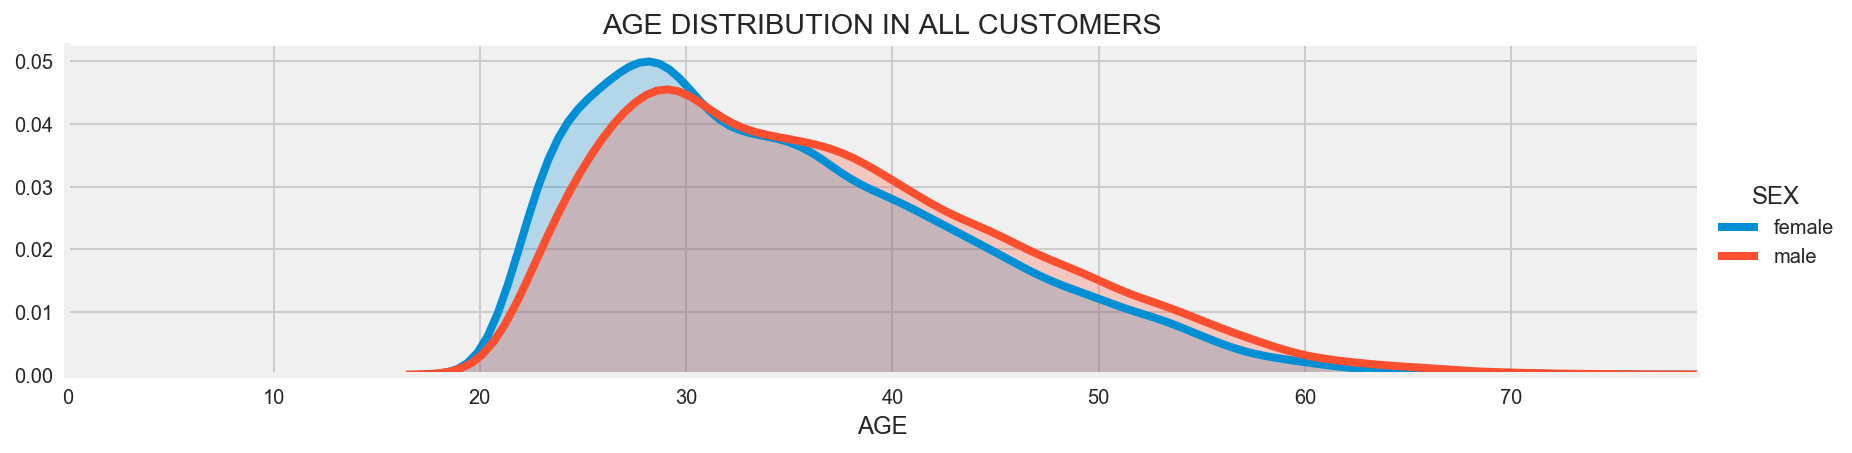

In [78]:
fig = sns.FacetGrid(credit, hue='SEX', aspect = 4)
fig.map(sns.kdeplot,'AGE',shade = True)
high = credit['AGE'].max()
fig.set(xlim = (0,high))
fig.set(title="AGE DISTRIBUTION IN ALL CUSTOMERS")
fig.add_legend()

The below shows the age distribution of just the default customers

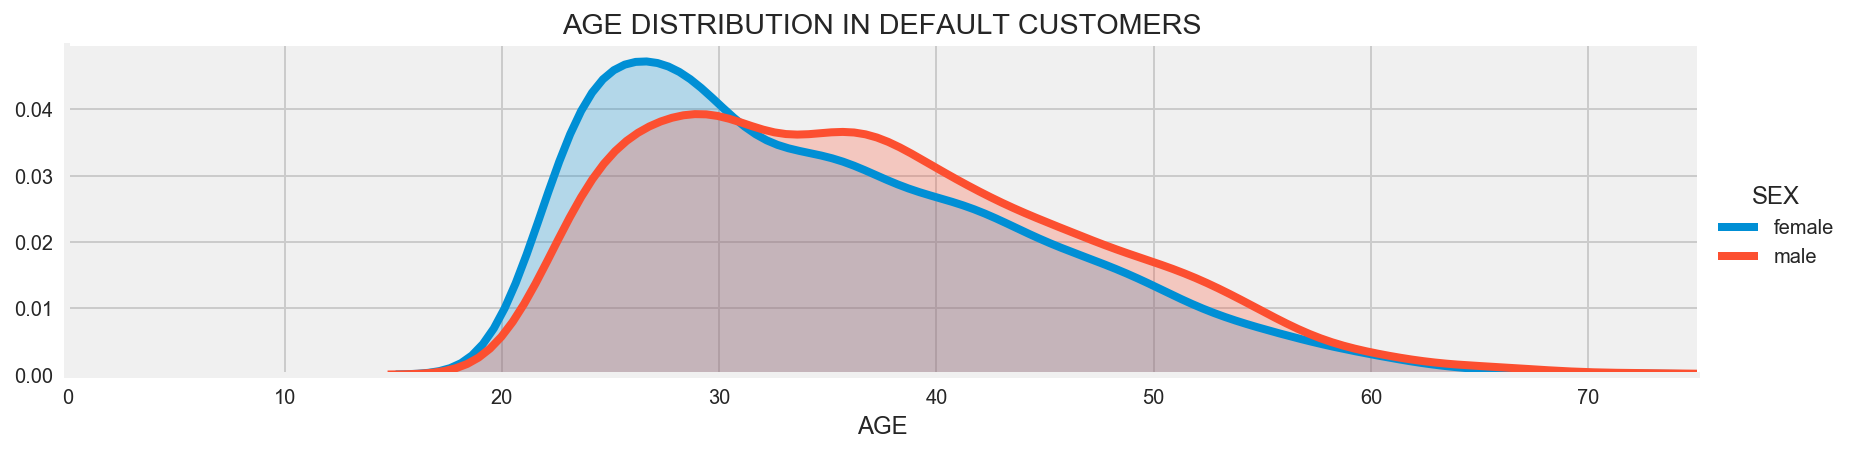

In [81]:
fig = sns.FacetGrid(default_table, hue='SEX', aspect = 4)
fig.map(sns.kdeplot,'AGE',shade = True)
high = default_table['AGE'].max()
fig.set(xlim = (0,high))
fig.set(title="AGE DISTRIBUTION IN DEFAULT CUSTOMERS")
fig.add_legend()

•	Most of the women defaulters are in the age group 21 to 28 & with the increase in age the chances of they are in default is less.
•	It is also important to note that the women around the age 21 to 28 are the main customers
•	There is a high density of default male customers in the age group from 24 to 40

Text(0.5, 1, 'Customers in each age group')

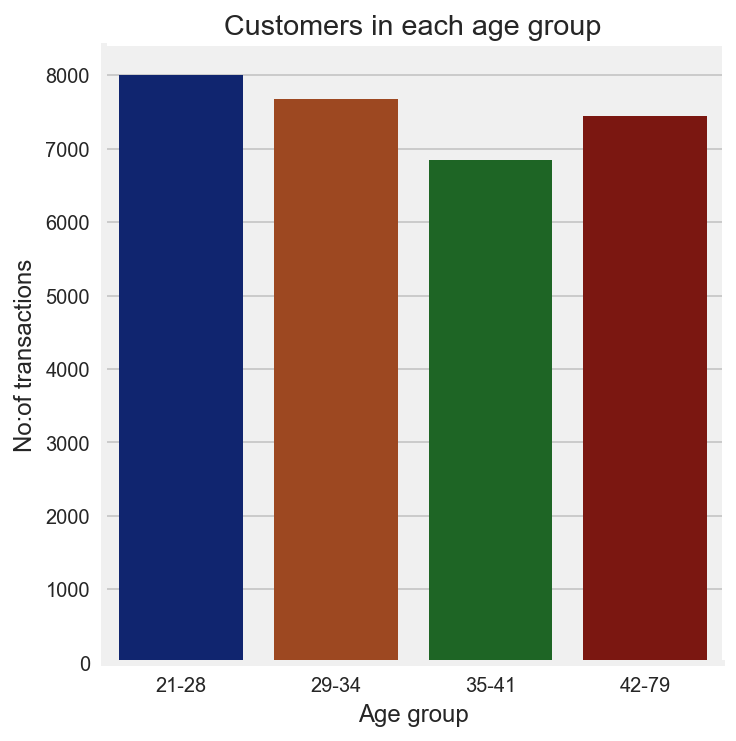

In [91]:
fig1 = sns.catplot(x='AGE_bin', data=credit,
                   kind='count',ci=False, palette="dark")
fig1.set_xticklabels(bin_labels_age)
plt.xlabel("Age group")
plt.ylabel("No:of transactions")
plt.title("Customers in each age group")

Text(0.5, 1, 'AGE DISTRIBUTION IN ALL CUSTOMERS')

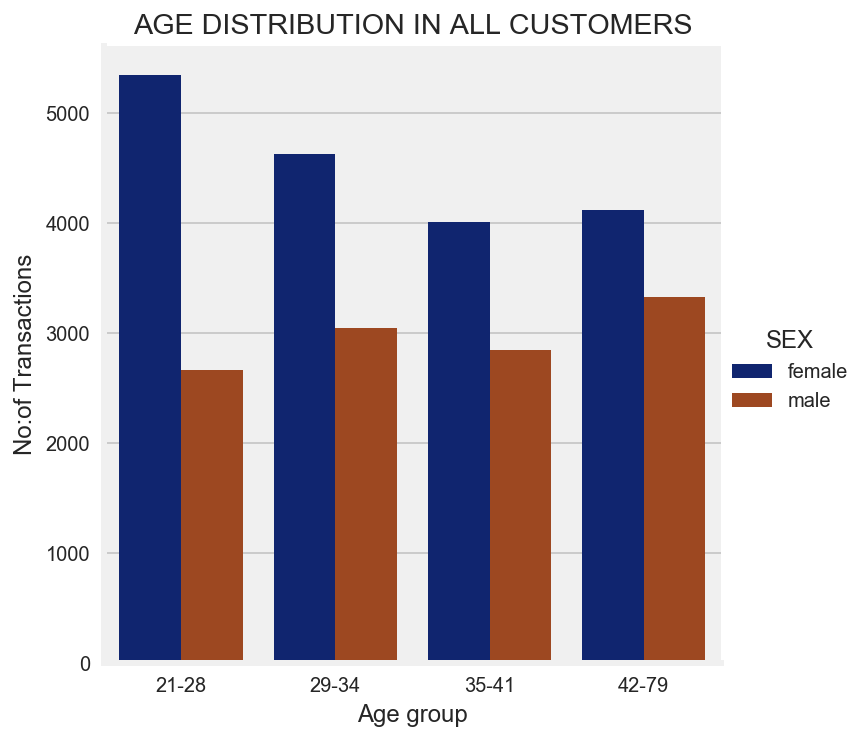

In [92]:
fig1 = sns.catplot(x='AGE_bin', data=credit,kind='count',
            hue='SEX',ci=False, palette="dark")
fig1.set_xticklabels(bin_labels_age)
plt.xlabel("Age group")
plt.ylabel("No:of Transactions")
plt.title("AGE DISTRIBUTION IN ALL CUSTOMERS")

HOW MUCH THEY SPEND? BILL AMOUNT IN EACH CATEGORY 

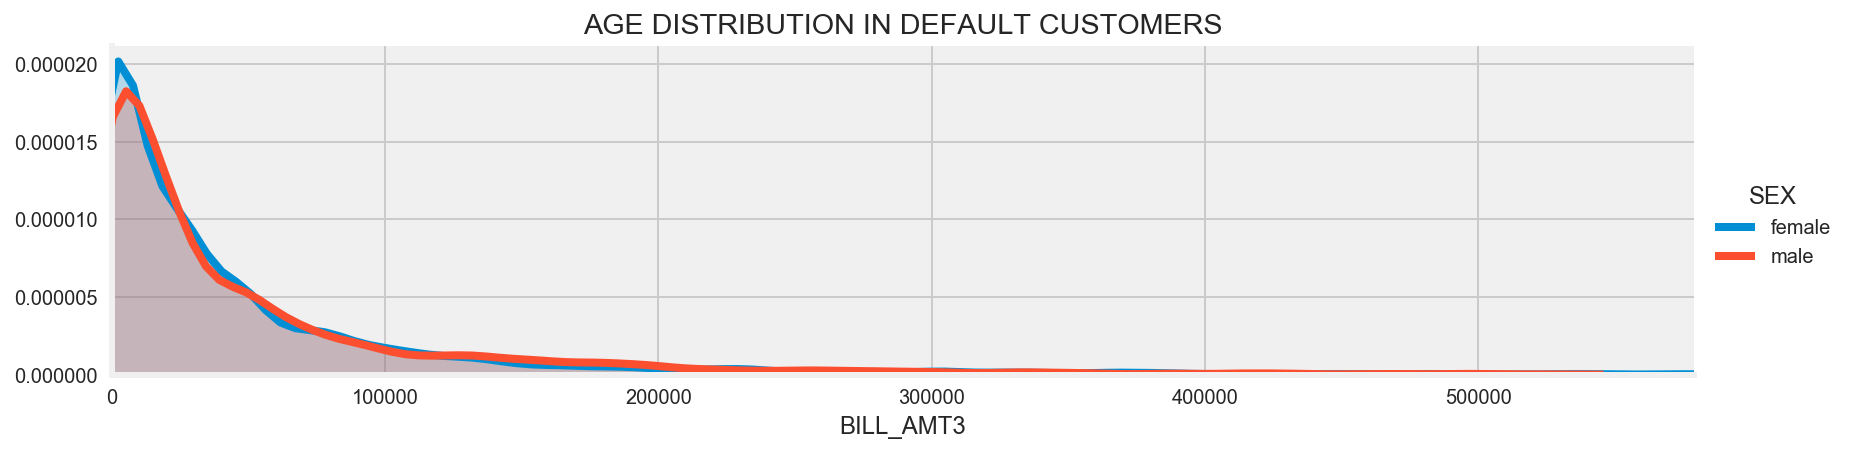

In [83]:
fig = sns.FacetGrid(default_table, hue='SEX', aspect = 4)
fig.map(sns.kdeplot,'BILL_AMT3',shade = True)
high = default_table['BILL_AMT3'].max()
fig.set(xlim = (0,high))
fig.set(title="AGE DISTRIBUTION IN DEFAULT CUSTOMERS")
fig.add_legend()

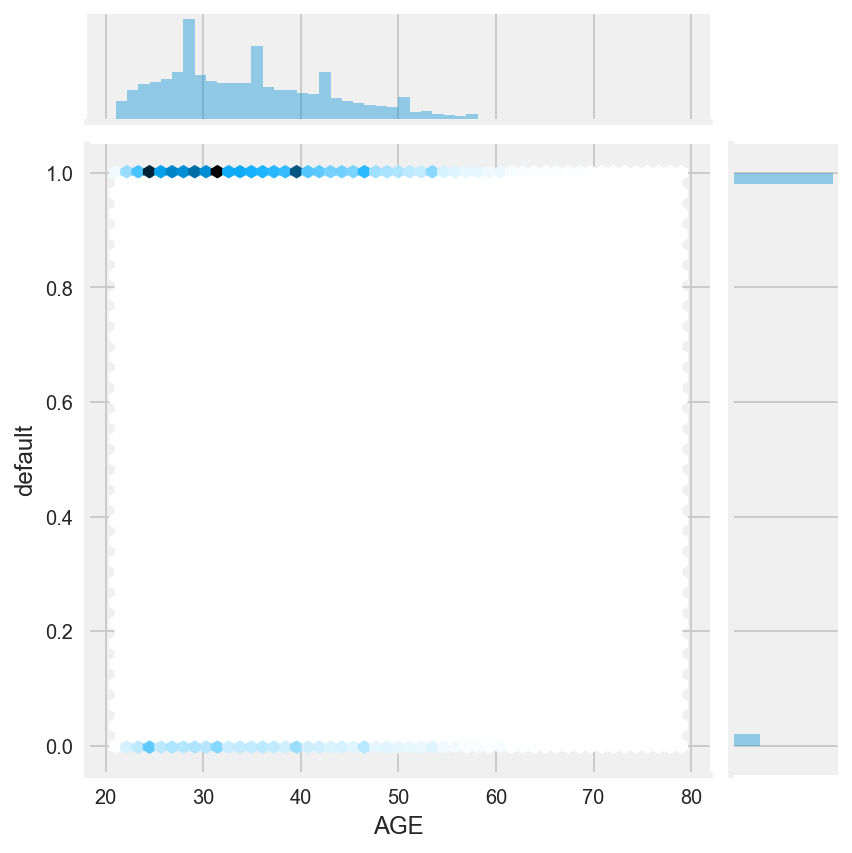

In [37]:
g = sns.jointplot('AGE','default',
                  data= credit, kind = 'hex')

The below shows the average bill amount in each customers & how they are amoung women & men 

Text(0.5, 1, 'Average Bill amount for each cutomers')

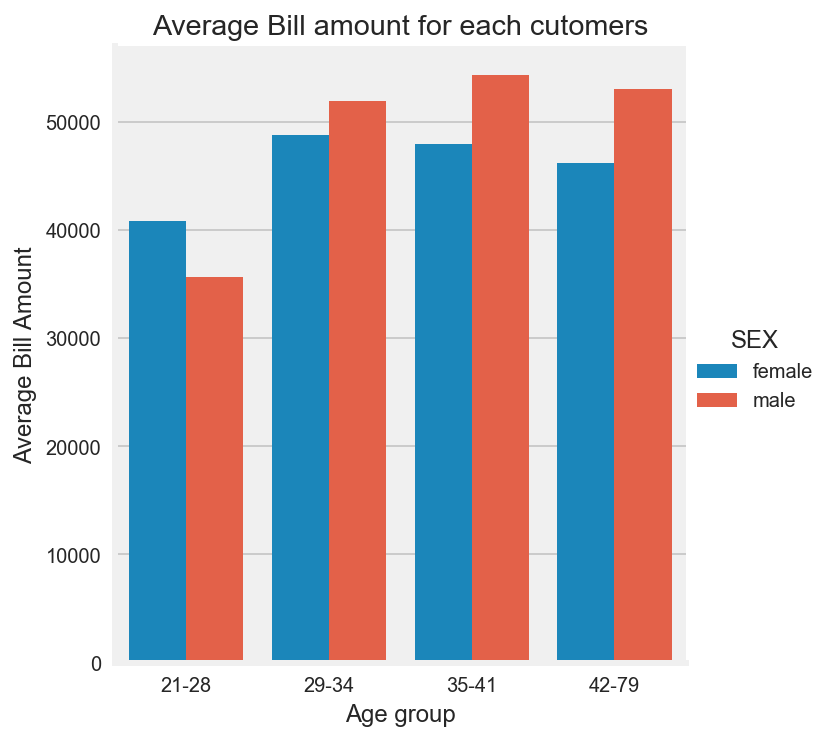

In [88]:
fig1 = sns.catplot(x='AGE_bin',y='BILL_AMT3', data=credit,kind='bar',
            hue='SEX',ci=False)
fig1.set_xticklabels(bin_labels_age)
plt.xlabel("Age group")
plt.ylabel("Average Bill Amount")
plt.title("Average Bill amount for each cutomers")

Text(0.5, 1, 'Average Bill amount for each cutomers')

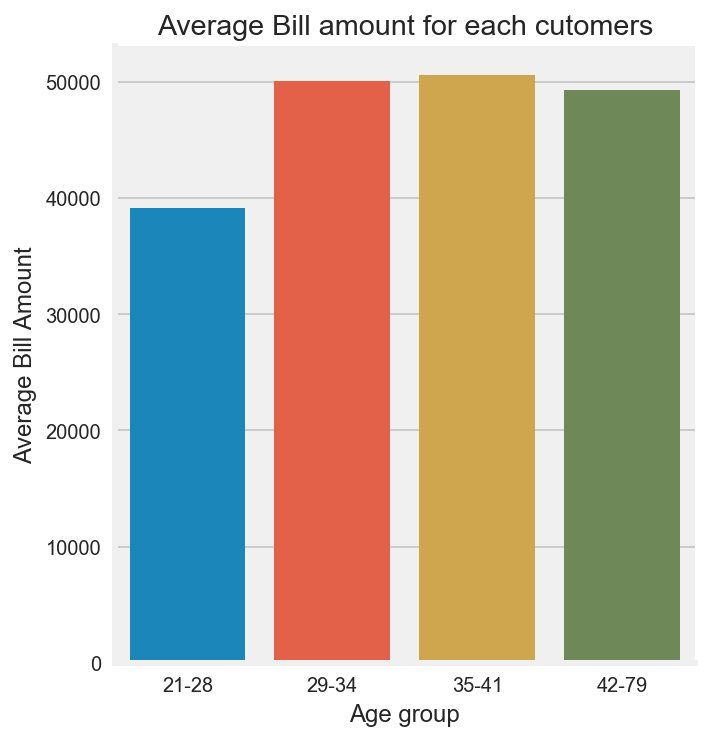

In [90]:
fig1 = sns.catplot(x='AGE_bin',y='BILL_AMT3', data=credit,
                   kind='bar',ci=False)
fig1.set_xticklabels(bin_labels_age)
plt.xlabel("Age group")
plt.ylabel("Average Bill Amount")
plt.title("Average Bill amount for each cutomers")

We can see even though the age group 21-28, shop more average amount spend is low in this age group. It is quite intersting to note that is only ag group where female average bill amount is higher than the male

#### PAYMENT STATUS FOR EACH CATEGORY OF CUSTOMERS

In [62]:
# lets dive into payment status altogether
pay_feats=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
credit[pay_feats[0]].value_counts().sort_index()

-2     2750
-1     5682
 0    14737
 1     3667
 2     2666
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

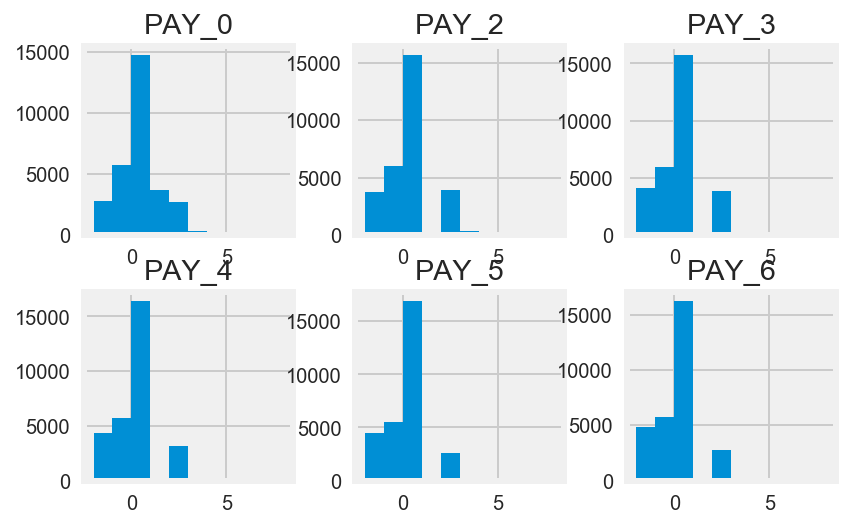

In [63]:
credit[pay_feats].hist(layout = (2,3))
plt.show()

if you observe the first graph it makes sense. What about the rest of them? Remember the definitions of the positive integer values of these features, and what each feature means. For example, PAY_2 is the repayment status in August, PAY_3 is the repayment status in July, and the others go further back in time. A value of 1 means payment delay for 1 month, while a value of 2 means payment delay for 2 months, and so forth.Did you notice that something doesn't seem right? Consider the values between July (PAY_3) and August (PAY_2). In July, there are very few accounts that had a 1-month payment delay; this bar is not really visible in the histogram. However, in August, there are suddenly thousands of accounts with a 2-month payment delay. This does not make sense: the number of accounts with a 2-month delay in a given month should be less than or equal to the number of accounts with a 1-month delay in the previous month. Let's take a closer look at accounts with a 2-month delay in August and see what the payment status was in July. We can do this with the following code, using a Boolean mask and .loc, as shown in the following snippet:

In [64]:
credit.loc[credit['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

PAY_2  PAY_3
0       2     -1
1       2      0
13      2      2
15      2      0
50      2      2

From Figure, it's clear that accounts with a 2-month delay in August have nonsensical values for the July payment status. The only way to progress to a 2-month delay should be from a 1-month delay the previous month, yet none of these accounts indicate that. When you see something like this in the data, you need to either check the logic in the query used to create the dataset or contact the person who gave you the dataset. After double-checking these results, for example using .value_counts() to view the numbers directly. So let us take only PAY_0 for our analysis. 

Payment status for each customer is different in 6 months. For visualizing the payment status for various category of customers, we consider payment status just for one month 
The below shows the payment status for each group:

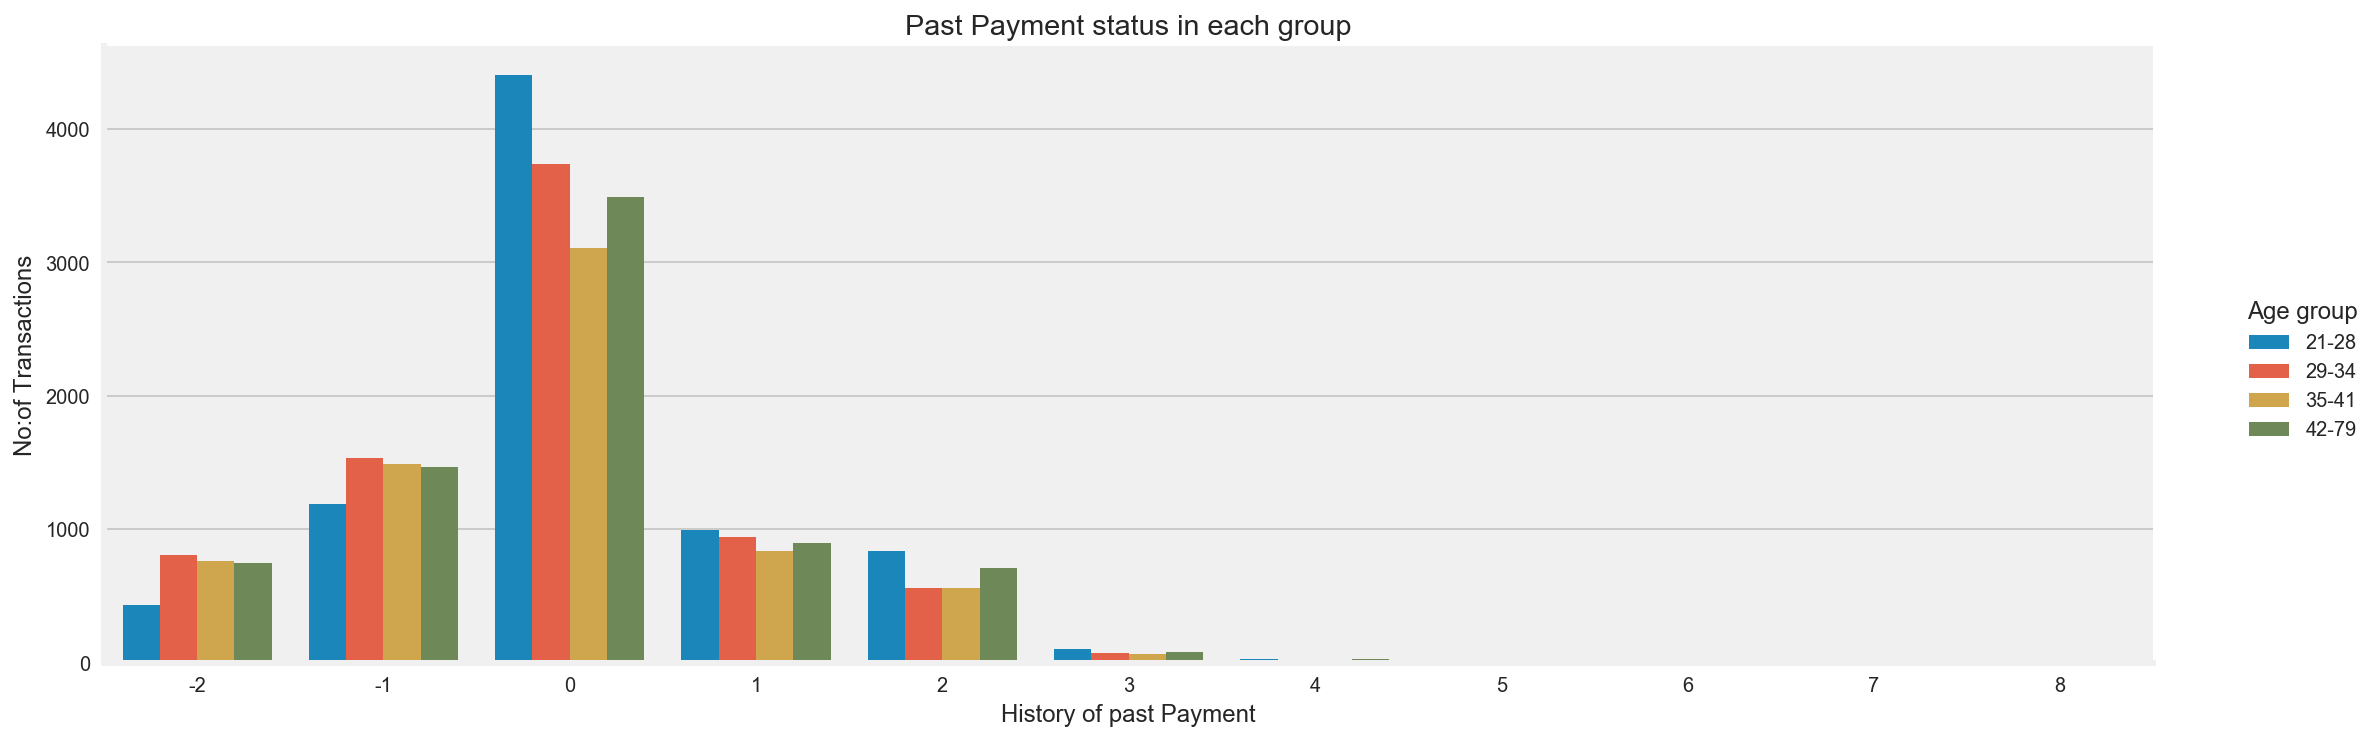

In [97]:
fig1 = sns.catplot('PAY_0', data = credit, hue = 'AGE_bin',
                   kind='count', aspect=3,height=5,legend_out = True)
plt.xlabel("History of past Payment")
plt.ylabel("No:of Transactions")
plt.title("Past Payment status in each group")
# plt.legend(loc='upper right')

# title
new_title = 'Age group'
fig1._legend.set_title(new_title)
# replace labels
new_labels = bin_labels_age
for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)

# plt.legend(loc='upper right')

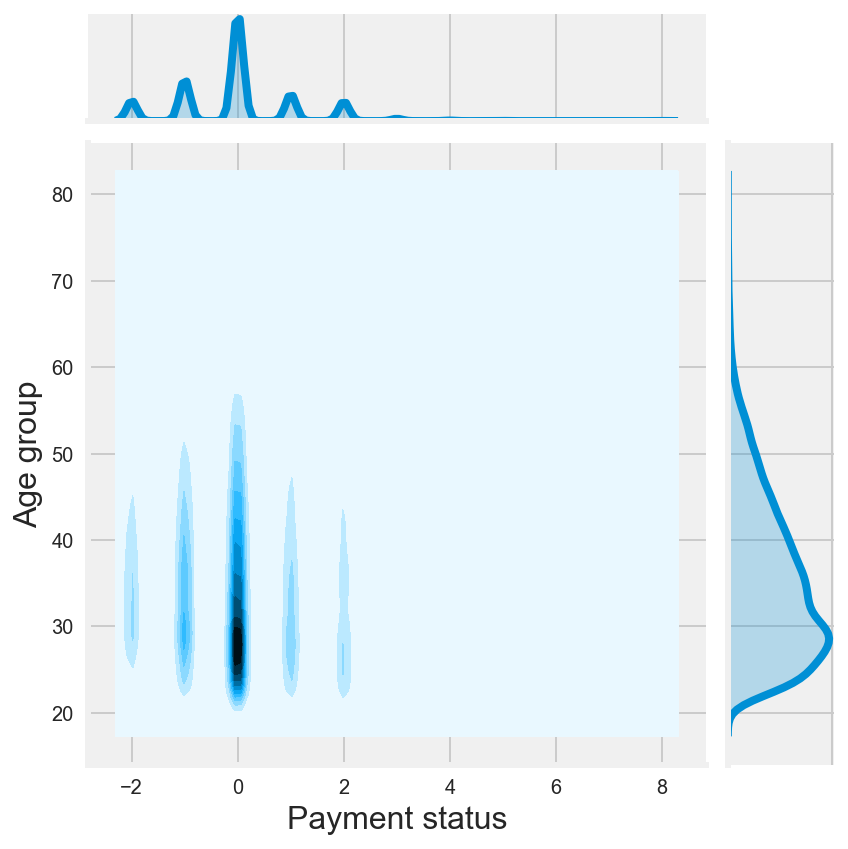

In [61]:
h = sns.jointplot('PAY_0','AGE', data= credit, kind = 'kde')
# JointGrid has a convenience function
h.set_axis_labels('x', 'Age group', fontsize=16)

# or set labels via the axes objects
h.ax_joint.set_xlabel('Payment status')

# also possible to manipulate the histogram plots this way, e.g.
h.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()
plt.show()

INFERENCE

Most customers like to use revolving credit

Age group 20 to 28, is less among the customers that pay in full &    customers with no consumptions. That concludes they usually do not pay in full. Rather use the revolving credit to do more purchase.


### PAYMENT STATUS WITH RESPECT TO MARITAL STATUS 

Let us investigate the payment status for women & men with respect to their marital status. 

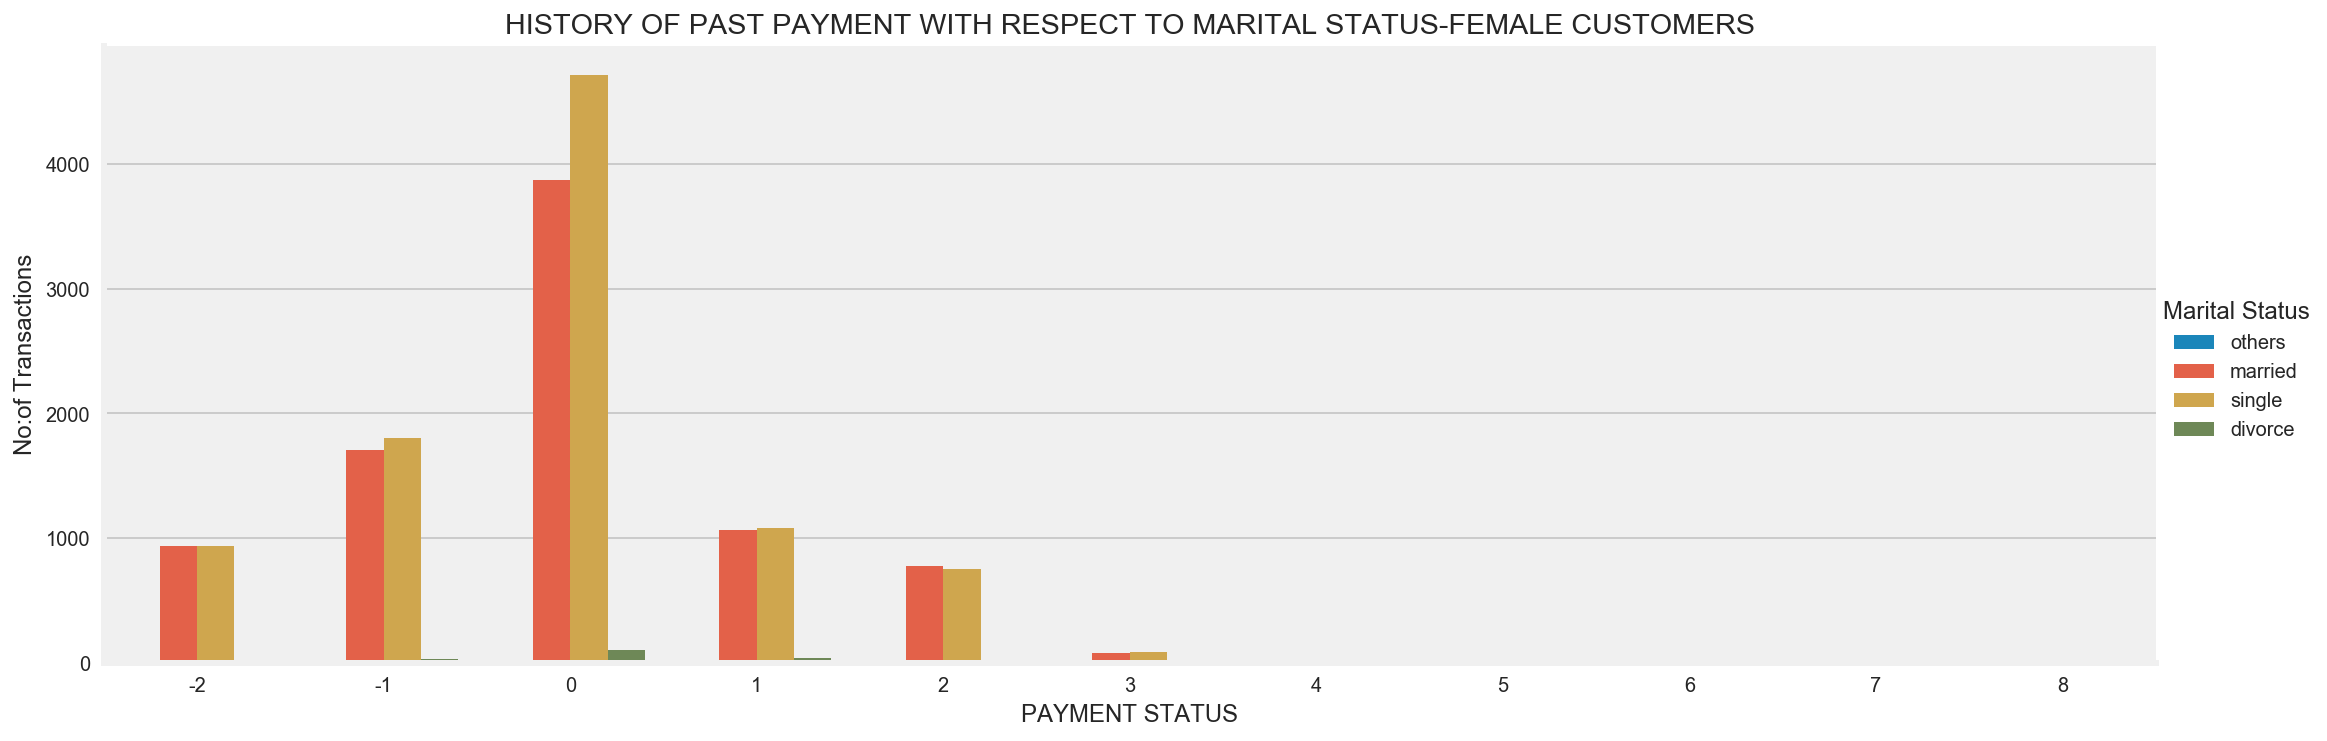

In [67]:
test = credit.loc[credit['SEX']=='female']
fig1 = sns.catplot('PAY_0', data = test, hue = 'MARRIAGE',
                   kind='count', aspect=3,height=5,legend_out=True)

plt.xlabel("PAYMENT STATUS")
plt.ylabel("No:of Transactions")
plt.title("HISTORY OF PAST PAYMENT WITH RESPECT TO MARITAL STATUS-FEMALE CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Marital Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','married','single','divorce']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)


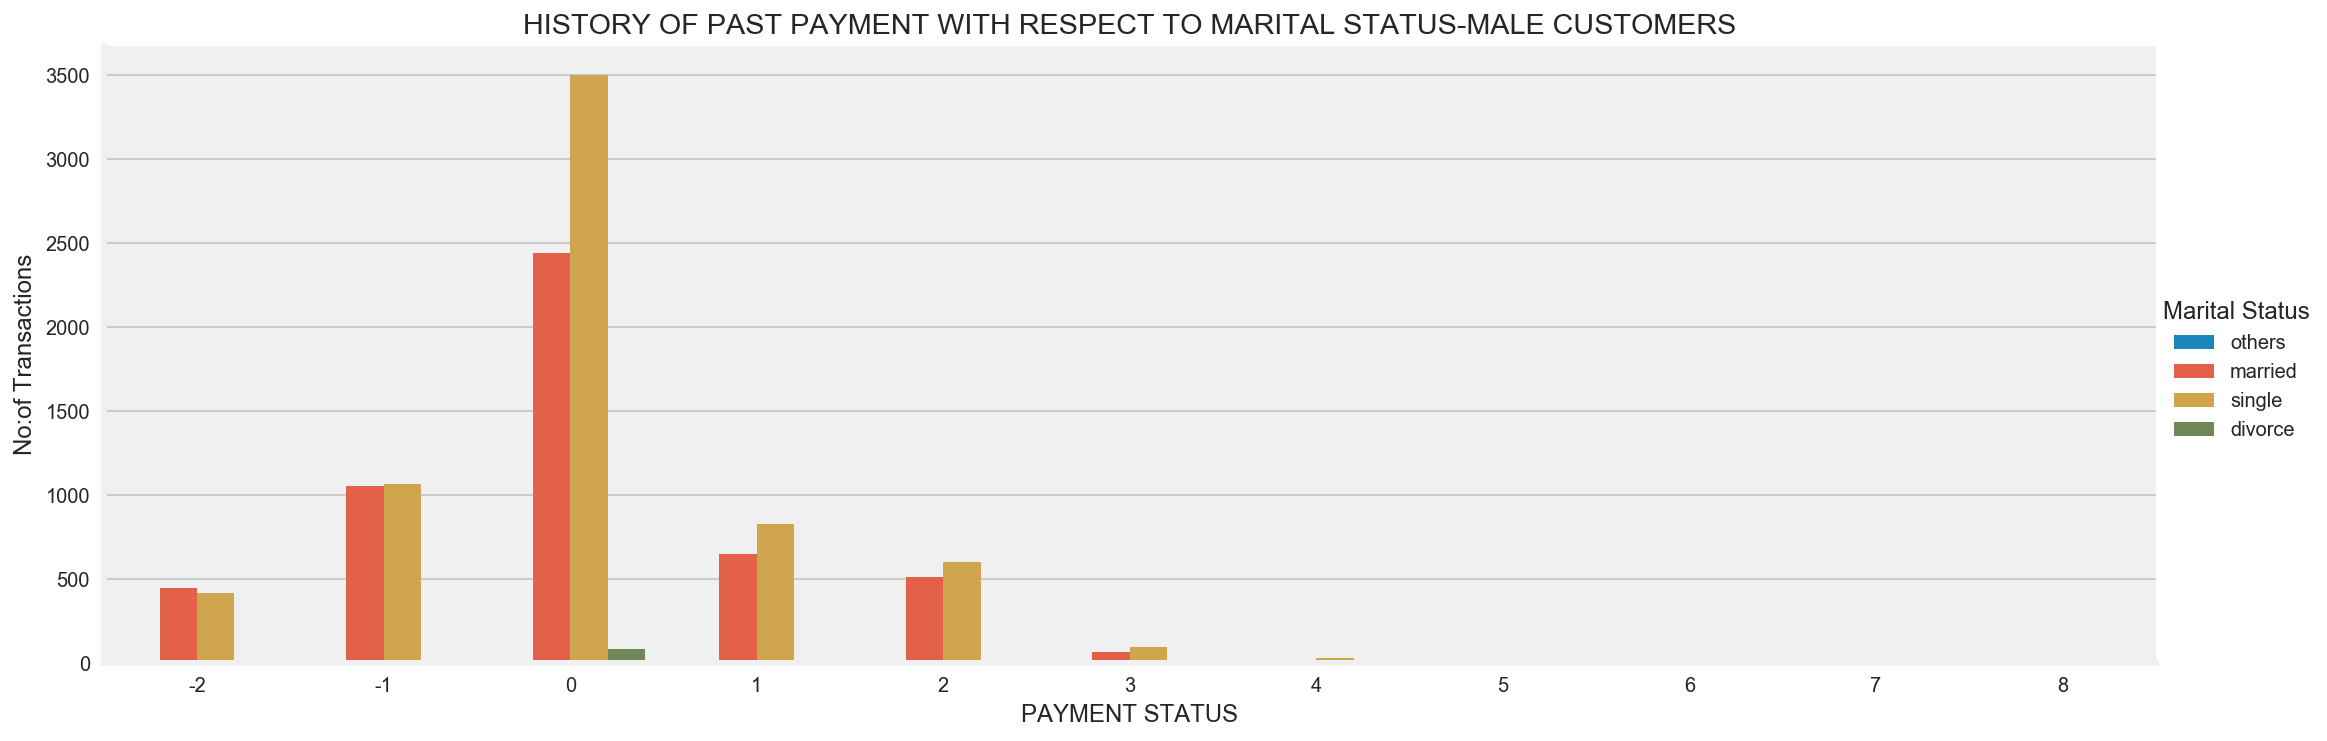

In [68]:
test = credit.loc[credit['SEX']=='male']
fig1 = sns.catplot('PAY_0', data = test, hue = 'MARRIAGE',
                   kind='count', aspect=3,height=5,legend_out=True)
plt.xlabel("PAYMENT STATUS")
plt.ylabel("No:of Transactions")
plt.title("HISTORY OF PAST PAYMENT WITH RESPECT TO MARITAL STATUS-MALE CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Marital Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','married','single','divorce']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)


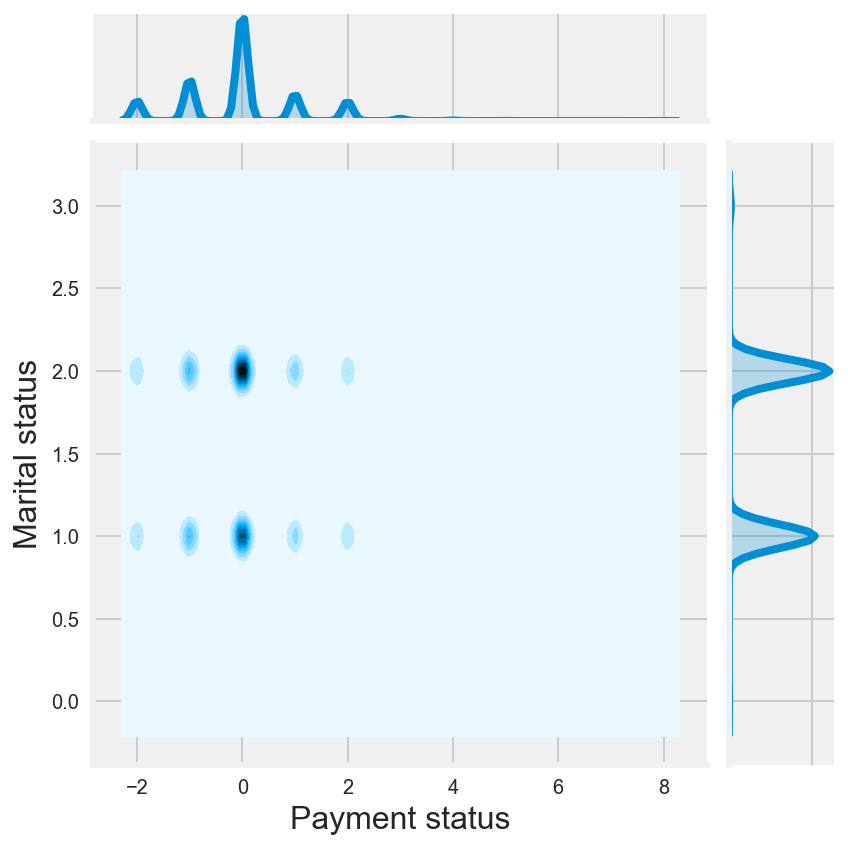

In [69]:
g = sns.jointplot('PAY_0','MARRIAGE', data= credit, kind = 'kde')
# JointGrid has a convenience function
g.set_axis_labels('x', 'Marital status', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Payment status')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

INFERENCE

Among both female & male customers, most of them are single and like to use the revolving credit. 

Considering payment delay in the female customers, most of them are single & married 

The pattern of payment delay among the women is same to that of male. But there is slight difference that lies in the type male customers who have more payment delay status. Single male customers are likely to be more in payment delay status.


### PAYMENT STATUS WITH RESPECT TO EDUCATIONAL  STATUS

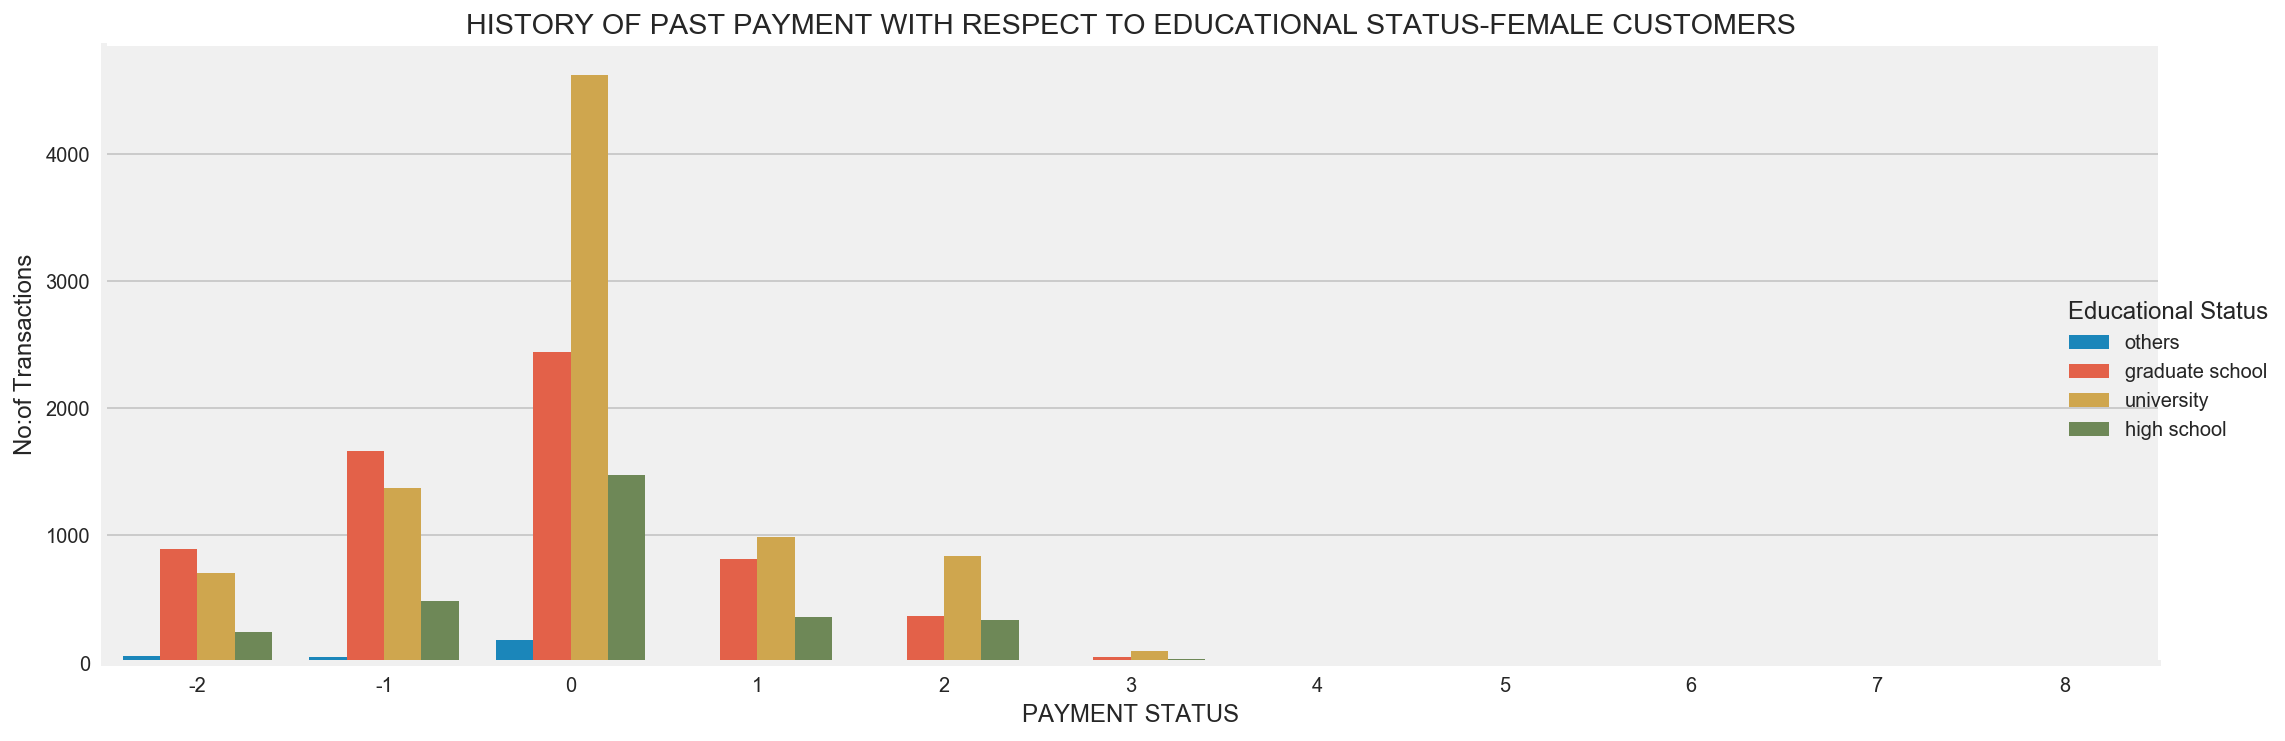

In [75]:
test = credit.loc[credit['SEX']=='female']
fig1 = sns.catplot('PAY_0', data = test,hue='Edu_list', 
                   kind='count', aspect=3,height=5,legend_out=True)
plt.xlabel("PAYMENT STATUS")
plt.ylabel("No:of Transactions")
plt.title("HISTORY OF PAST PAYMENT WITH RESPECT TO EDUCATIONAL STATUS-FEMALE CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Educational Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','graduate school','university','high school']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)

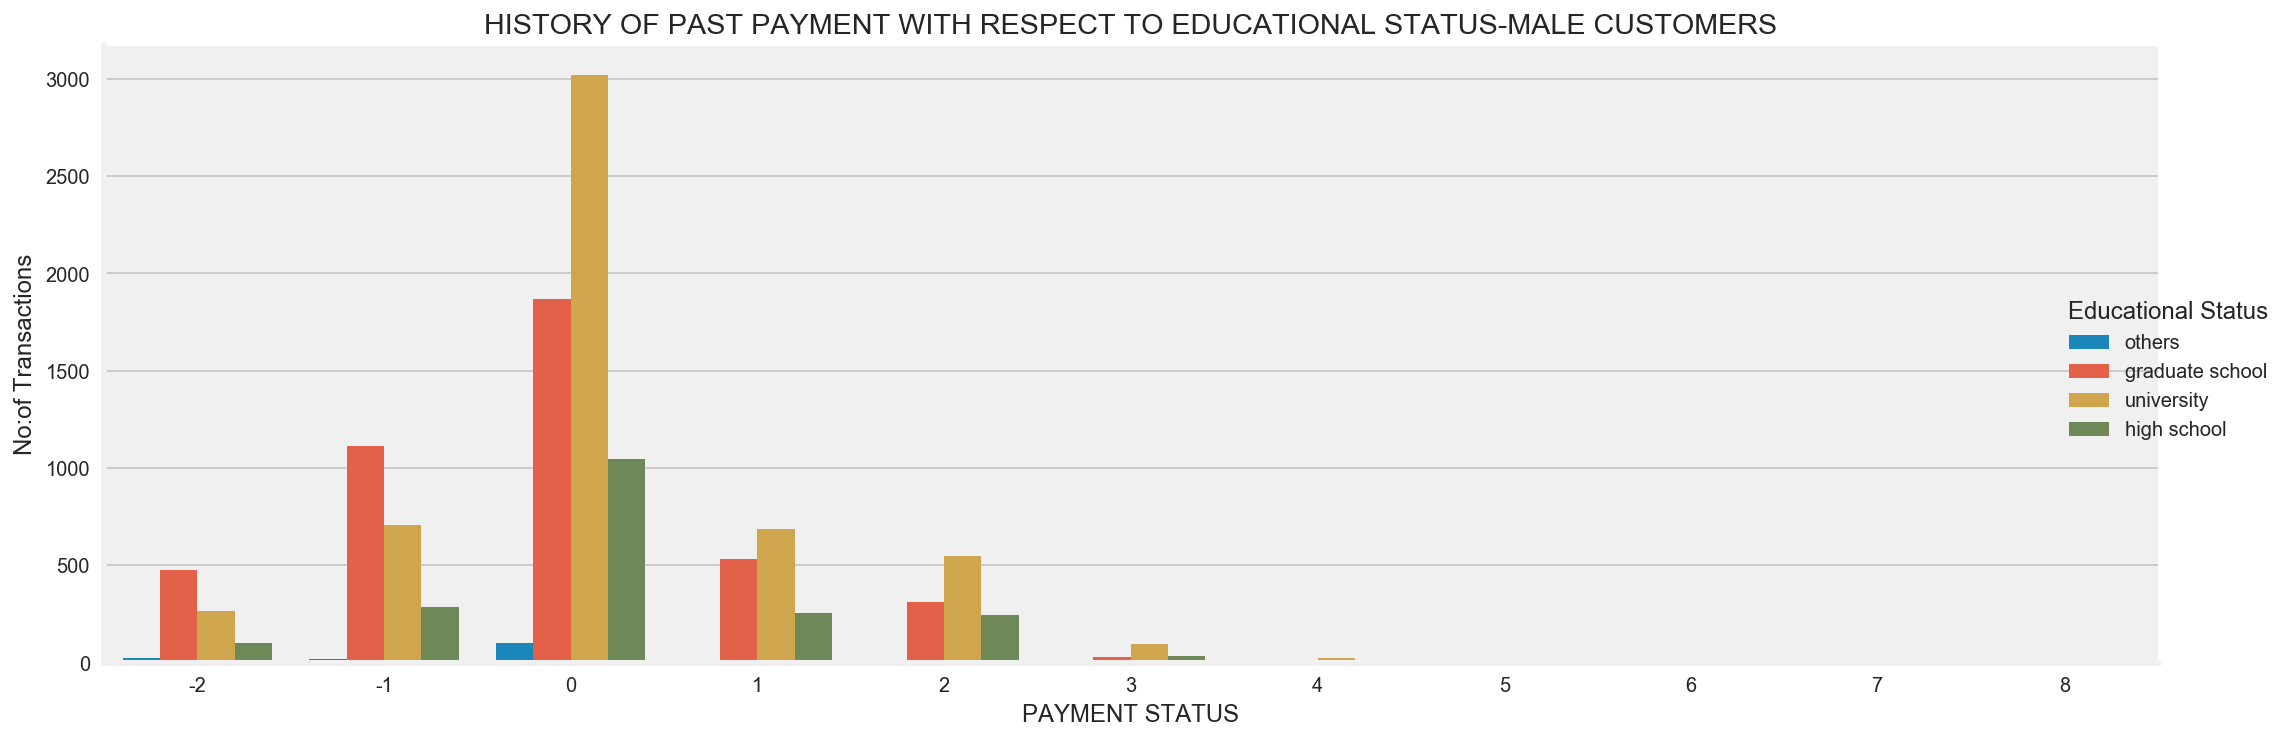

In [74]:
test = credit.loc[credit['SEX']=='male']
fig1 = sns.catplot('PAY_0', data = test,hue='Edu_list', 
                   kind='count', aspect=3,height=5,legend_out=True)
plt.xlabel("PAYMENT STATUS")
plt.ylabel("No:of Transactions")
plt.title("HISTORY OF PAST PAYMENT WITH RESPECT TO EDUCATIONAL STATUS-MALE CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Educational Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','graduate school','university','high school']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)

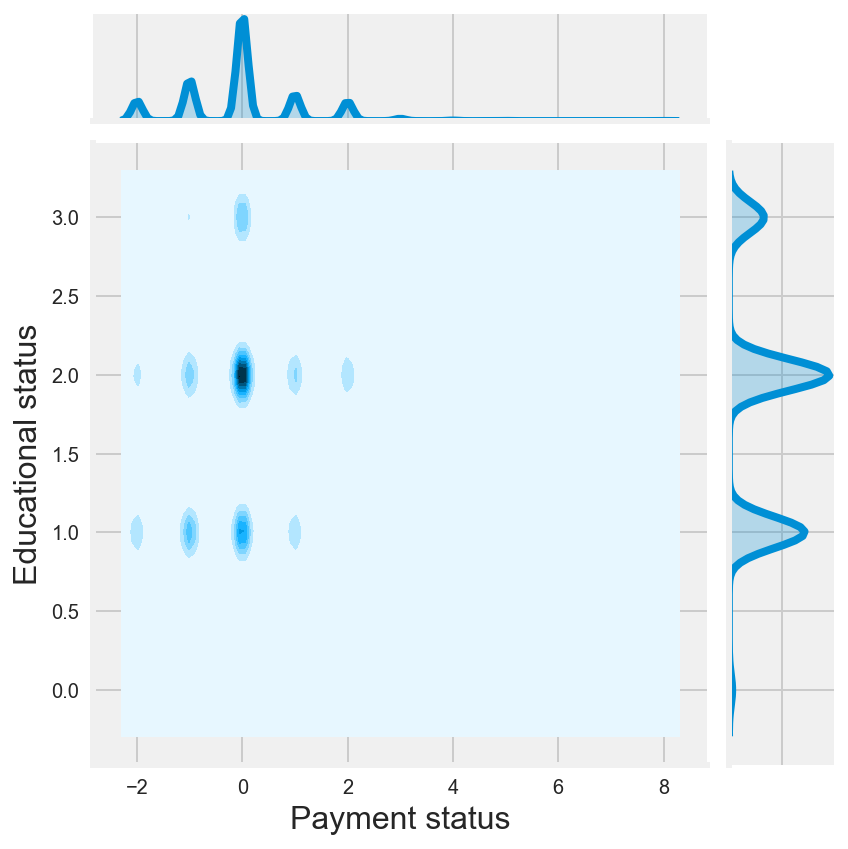

In [76]:
g = sns.jointplot('PAY_0','Edu_list', data= credit, kind = 'kde')
g.set_axis_labels('x', 'Educational status', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Payment status')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

INFERENCE

By looking into the above graphs of both female & male, they show same pattern in payment status when considering the educational status. So, we can say sex alone is not factor in predicting the payment status. Seeing the above graph, even though sex does change the pattern, it does change the count. Female customers are more compared to the male customers. 

Customers with university education mostly use the revolving credit. They are also high when coming to the customers with payment delay.

Customers with graduate education mostly make full payment


### WHO ARE THE DEFAULTERS AMOUNG THE FEMALE CUSTOMERS?

Female customers are high when compared to the male. Each customer can vary depending upon their age, education & marital status. Each feature can play a major role in financial status of customers, which in turn determines whether they are defaulters or not. 
The below shows the number of default customers in each age group, considering marital & educational status:

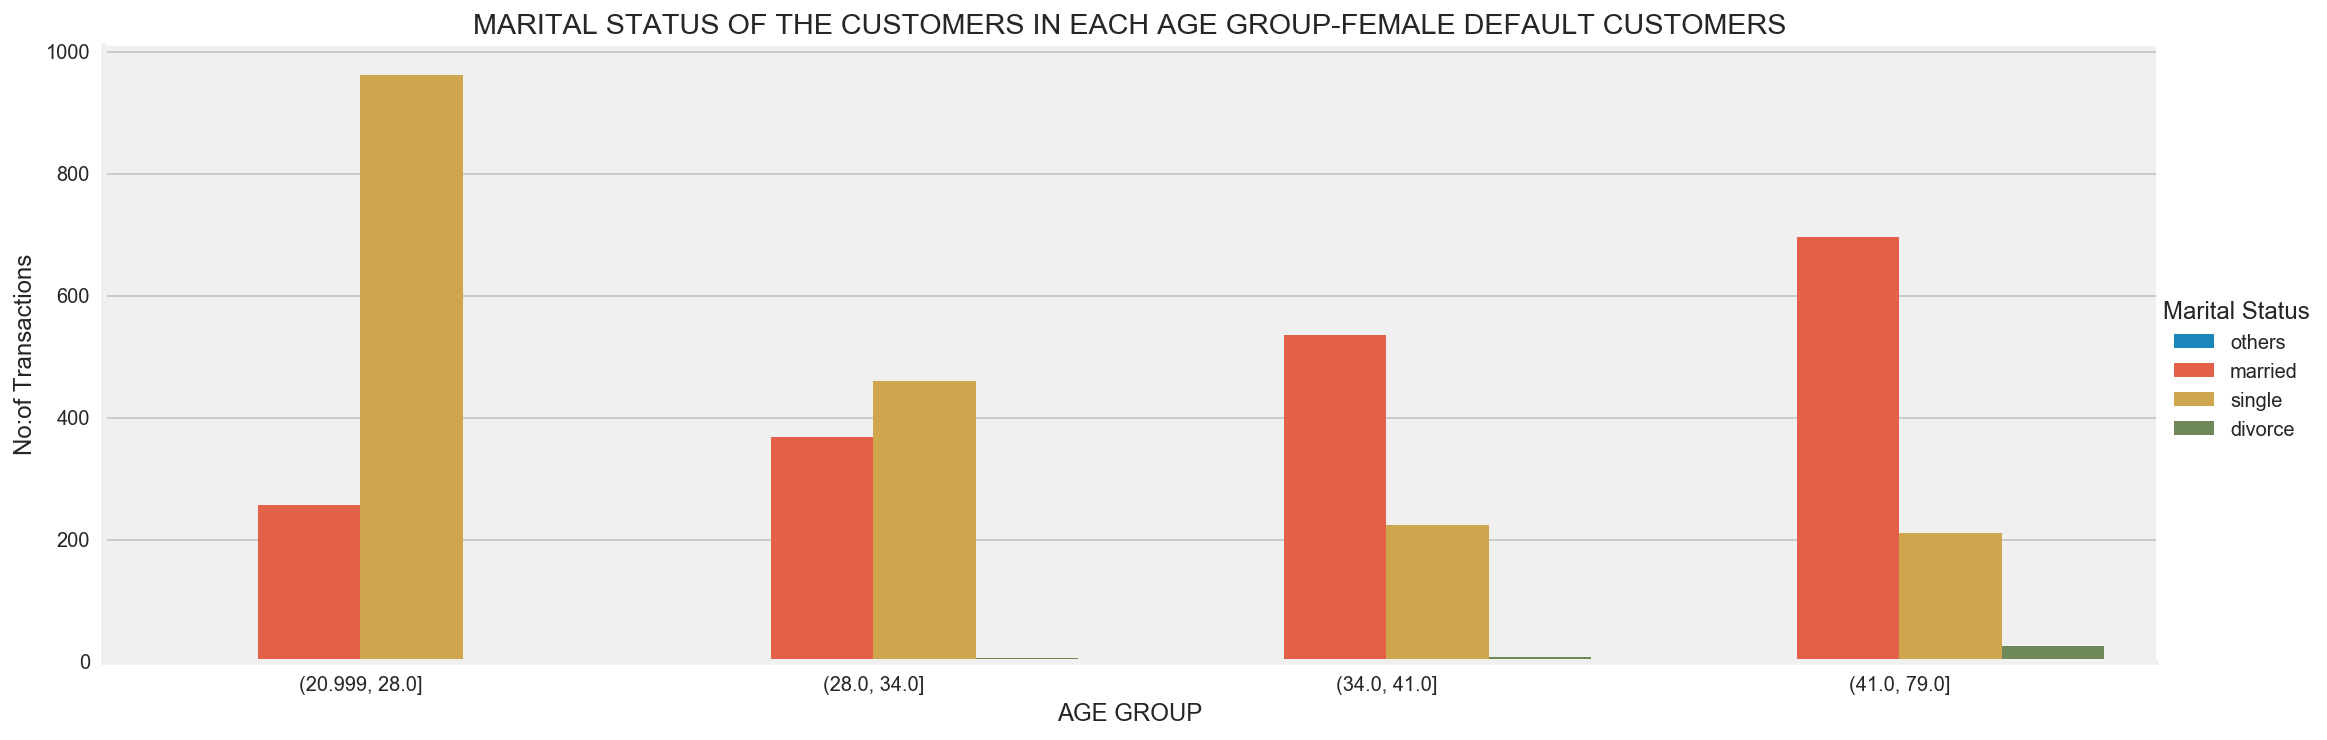

In [78]:
test = default_table.loc[default_table['SEX']=='female']
fig1 = sns.catplot('AGE_bin', data = test, hue = 'MARRIAGE',
                   kind='count', aspect=3,height=5,legend_out = True)

plt.xlabel("AGE GROUP")
plt.ylabel("No:of Transactions")
plt.title("MARITAL STATUS OF THE CUSTOMERS IN EACH AGE GROUP-FEMALE DEFAULT CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Marital Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','married','single','divorce']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)

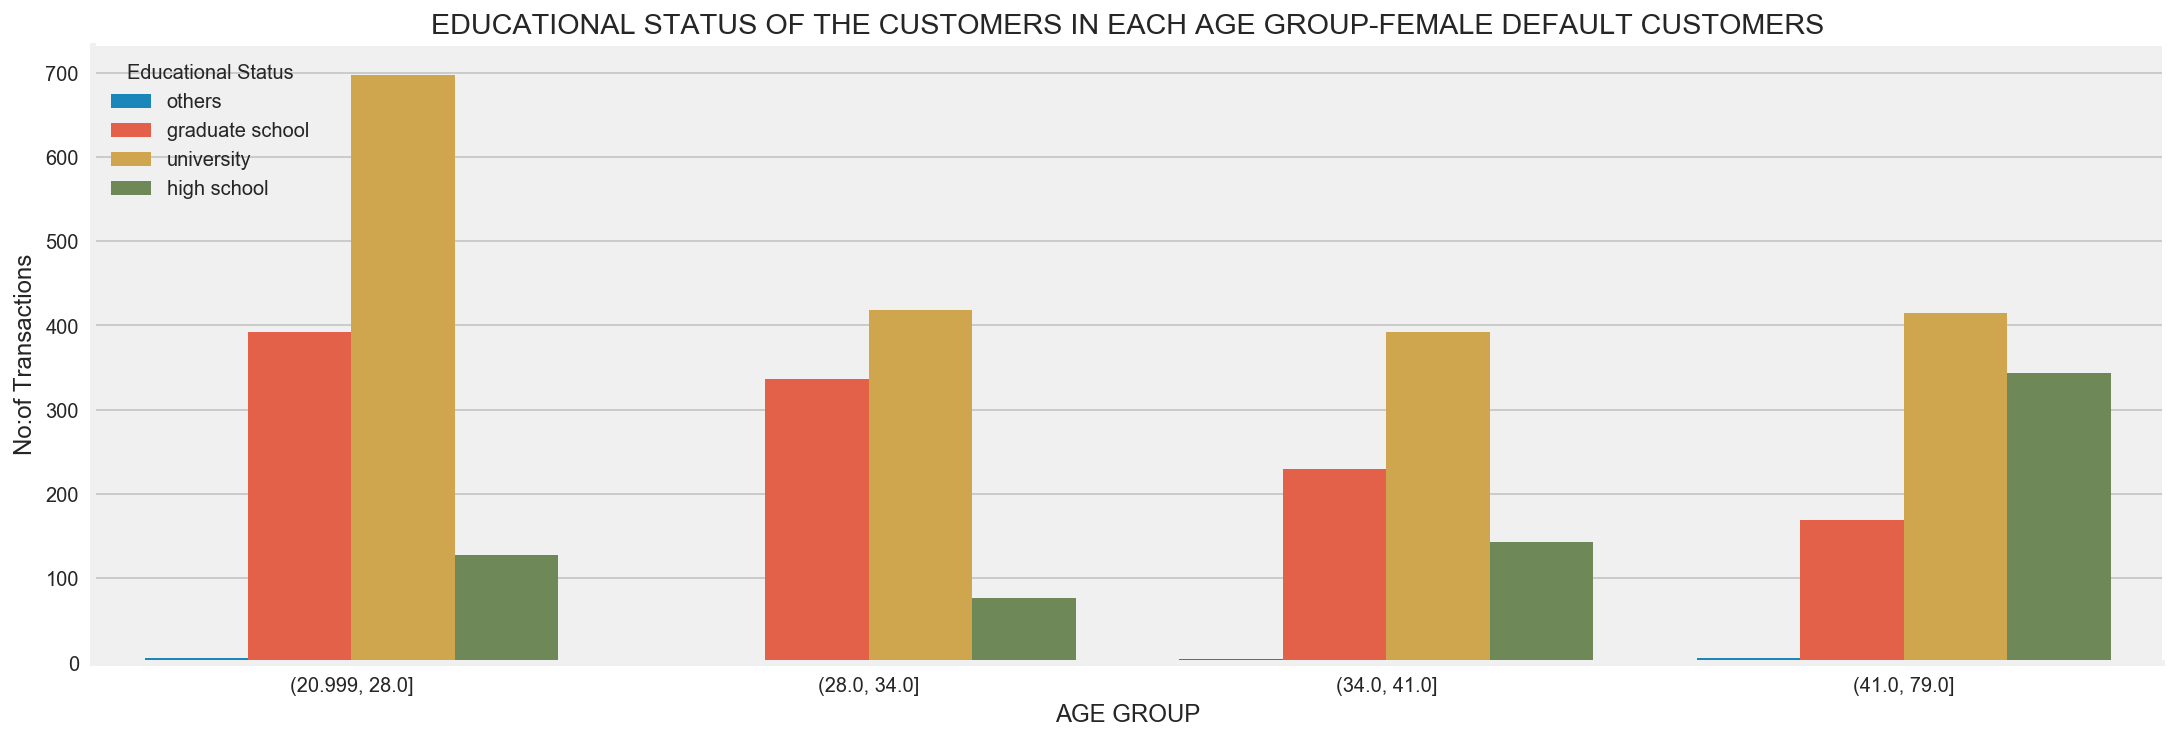

In [80]:
test = default_table.loc[default_table['SEX']=='female']
fig1 = sns.catplot('AGE_bin', data = test, hue = 'Edu_list',
                   kind='count', aspect=3,height=5,legend= False)

plt.xlabel("AGE GROUP")
plt.ylabel("No:of Transactions")
plt.title("EDUCATIONAL STATUS OF THE CUSTOMERS IN EACH AGE GROUP-FEMALE DEFAULT CUSTOMERS")
plt.legend(title='Educational Status', loc='upper left', labels=['others','graduate school','university','high school'])
plt.show(fig1)


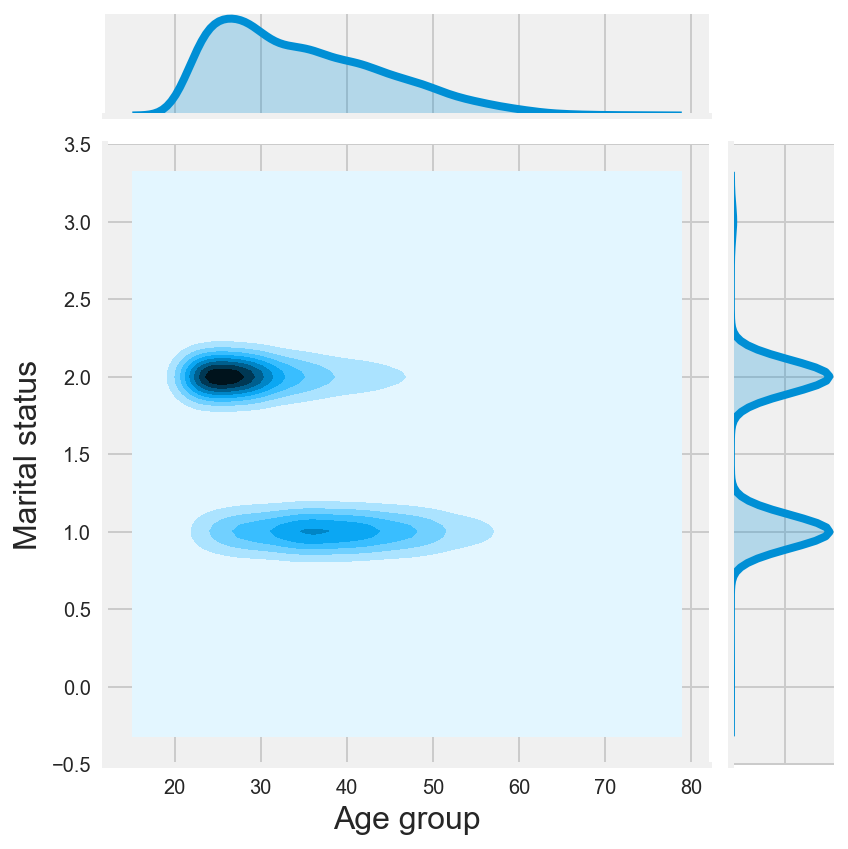

In [85]:
#DEFAULT FEMALE - MARITAL STATUS
test = default_table.loc[default_table['SEX']=='female']
g = sns.jointplot('AGE','MARRIAGE', data= test, kind = 'kde')
# JointGrid has a convenience function
g.set_axis_labels('x', 'Marital status', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Age group')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') 

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

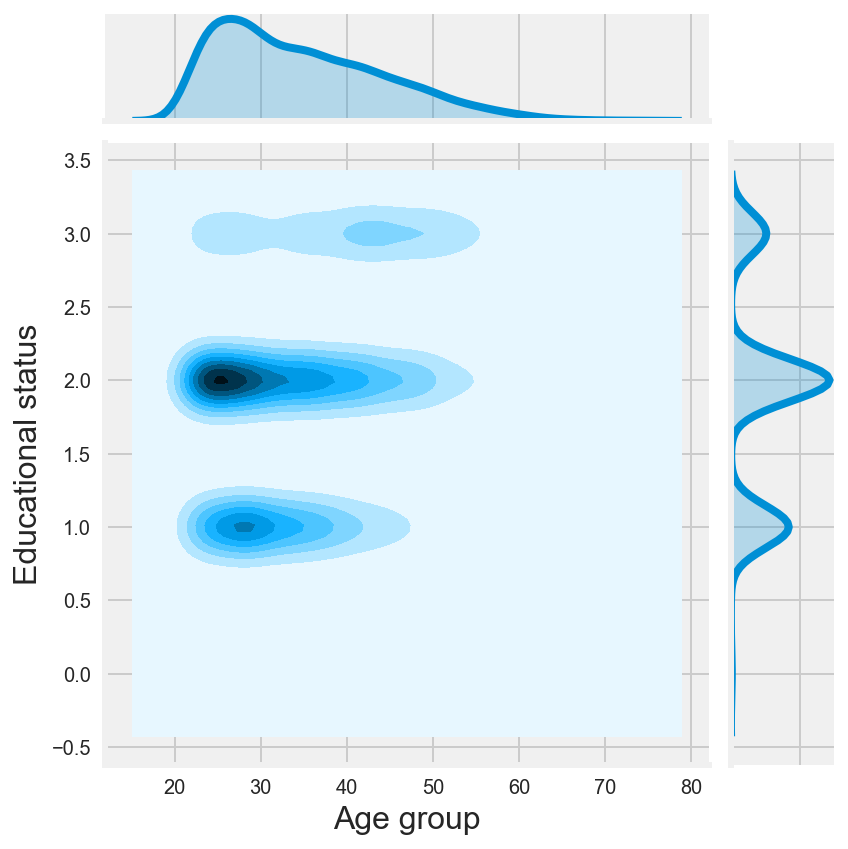

In [86]:
#DEFAULT FEMALE - EDUCATIONAL STATUS
test = default_table.loc[default_table['SEX']=='female']
g = sns.jointplot('AGE','Edu_list', data= test, kind = 'kde')
# JointGrid has a convenience function
g.set_axis_labels('x', 'Educational status', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Age group')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') 

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

INFERENCE

In age group 21 to 34, most of the women customers are single with the educational qualification of university

In age group 35 to 79, most of the women customers are married with the educational qualification of university

Women customers with high school educational qualification, tends to be more in default list as the age increases. They are quite high in the age 42 to 79

On contrary women customers with graduate school educational qualification, tends to be less in default list as the age increases. They are quite high in the age 21 to 28. 


### WHO ARE THE DEFAULTERS AMOUNG THE MALE CUSTOMERS?

As said earlier female customers are high when compared to the male. Influence of customer features like age, educational status & marital status on the default customers is not exactly same on male & female customers. We already saw the who are most likely to be defaulters in female customer list. Let us now consider the male customers.
The below shows the number of default customers in each age group, considering marital & educational status:


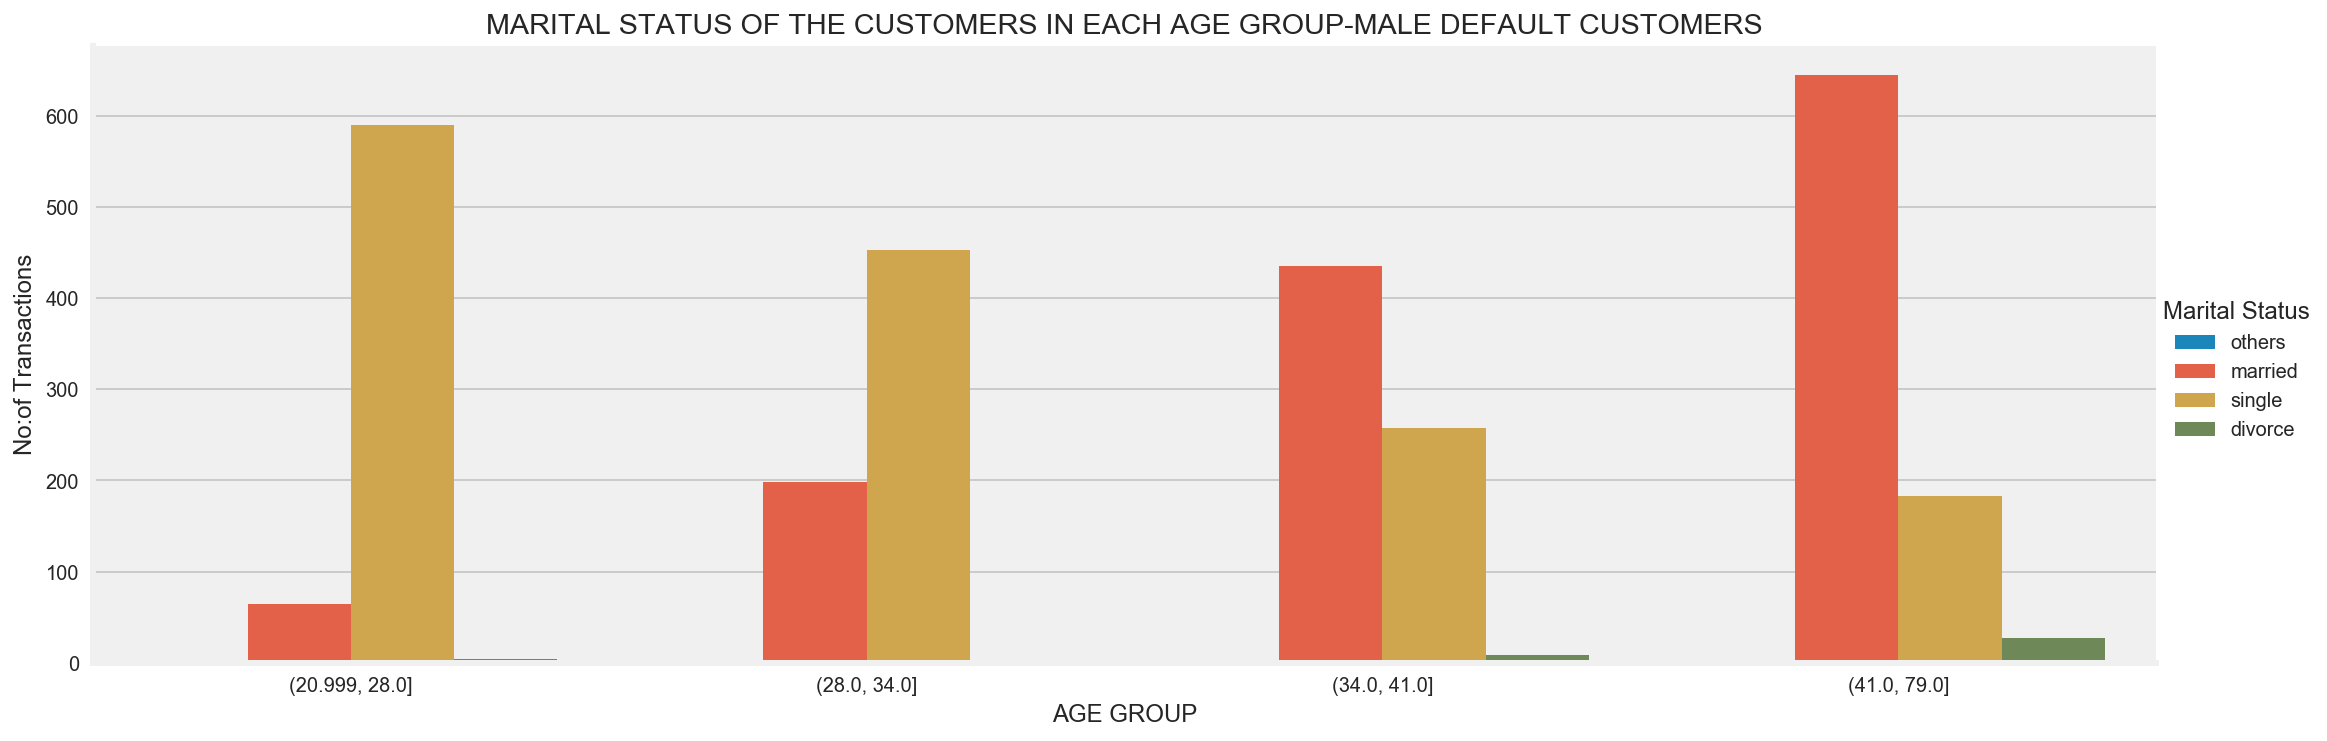

In [87]:
test = default_table.loc[default_table['SEX']=='male']
fig1 = sns.catplot('AGE_bin', data = test, hue = 'MARRIAGE',
                   kind='count', aspect=3,height=5,legend_out = True)

plt.xlabel("AGE GROUP")
plt.ylabel("No:of Transactions")
plt.title("MARITAL STATUS OF THE CUSTOMERS IN EACH AGE GROUP-MALE DEFAULT CUSTOMERS")
# plt.legend(loc='upper right')

# title
new_title = 'Marital Status'
fig1._legend.set_title(new_title)
# replace labels
new_labels = ['others','married','single','divorce']


for t, l in zip(fig1._legend.texts, new_labels): t.set_text(l)

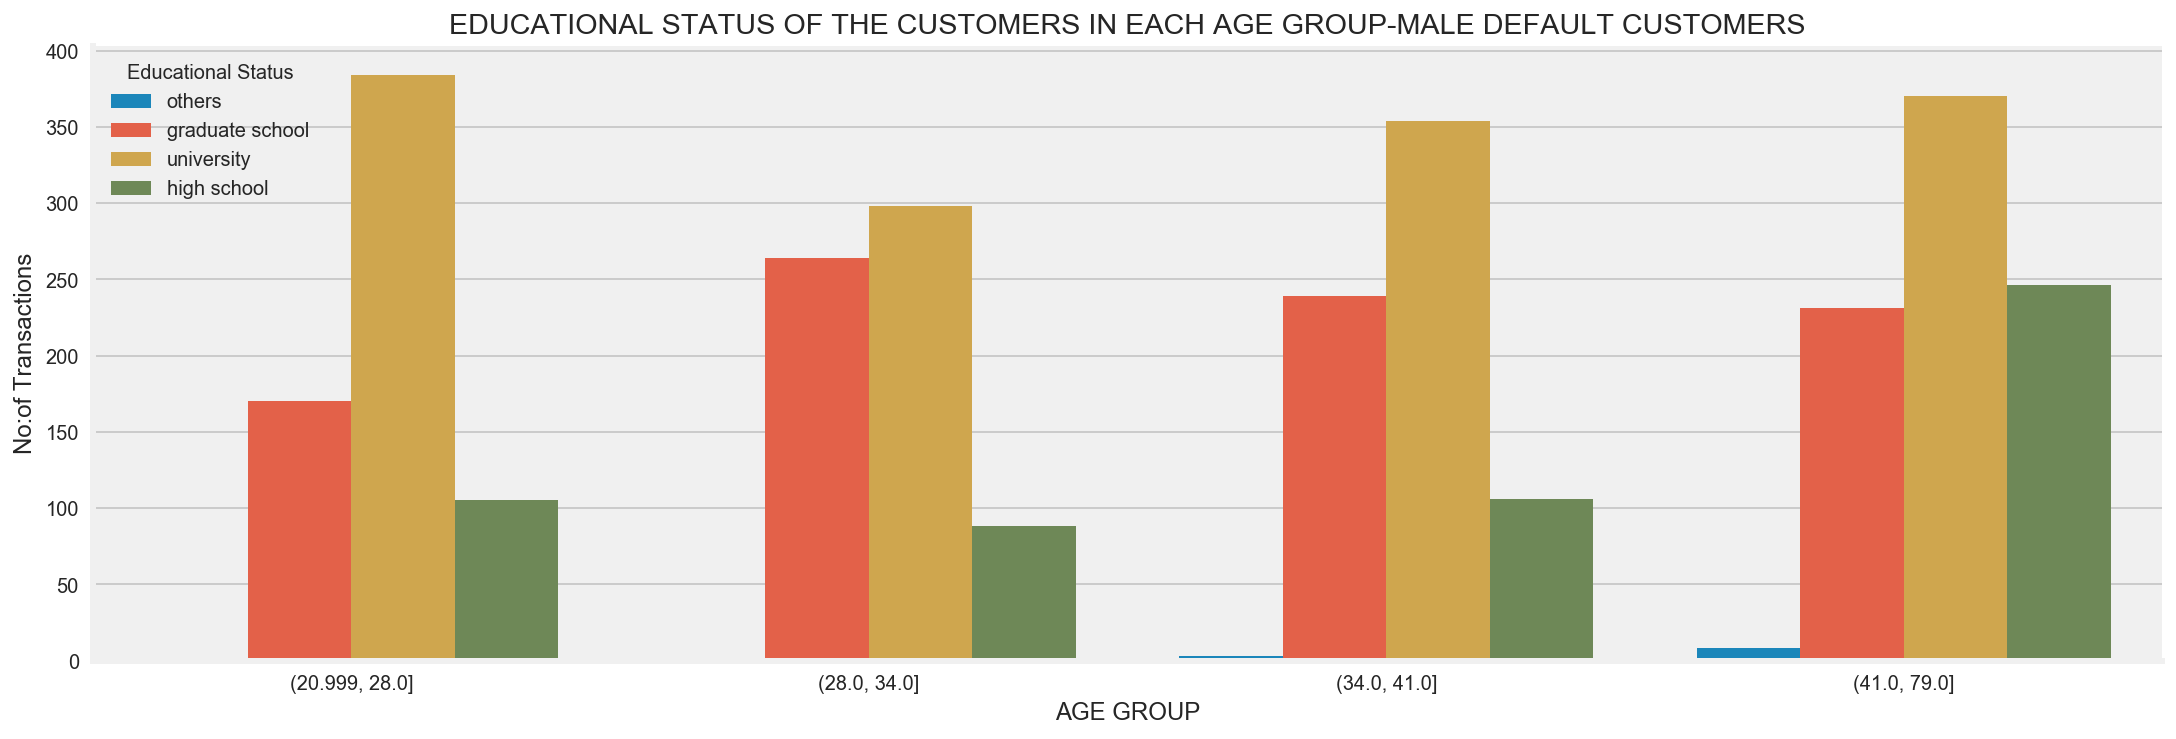

In [89]:
test = default_table.loc[default_table['SEX']=='male']
fig1 = sns.catplot('AGE_bin', data = test, hue = 'Edu_list',
                   kind='count', aspect=3,height=5,legend = False)
plt.xlabel("AGE GROUP")
plt.ylabel("No:of Transactions")
plt.title("EDUCATIONAL STATUS OF THE CUSTOMERS IN EACH AGE GROUP-MALE DEFAULT CUSTOMERS")
plt.legend(title='Educational Status', loc='upper left', labels=['others','graduate school','university','high school'])

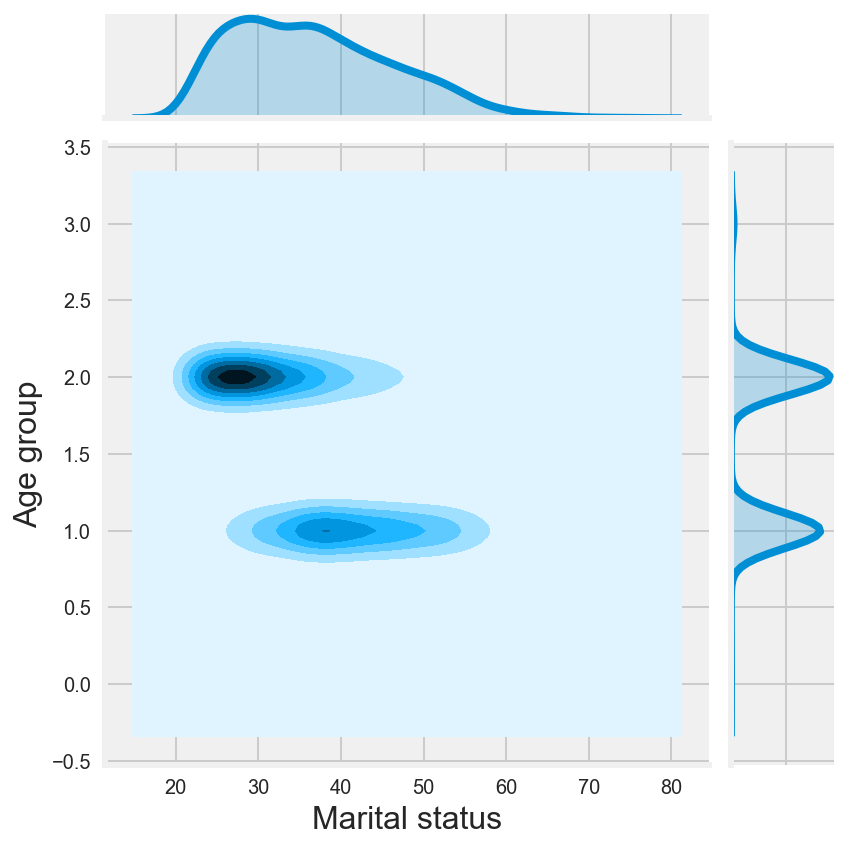

In [90]:
#DEFAULT MALE - MARITAL STATUS
test = default_table.loc[default_table['SEX']=='male']
g = sns.jointplot('AGE','MARRIAGE', data= test, kind = 'kde')
# JointGrid has a convenience function
g.set_axis_labels('x', 'Age group', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Marital status')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

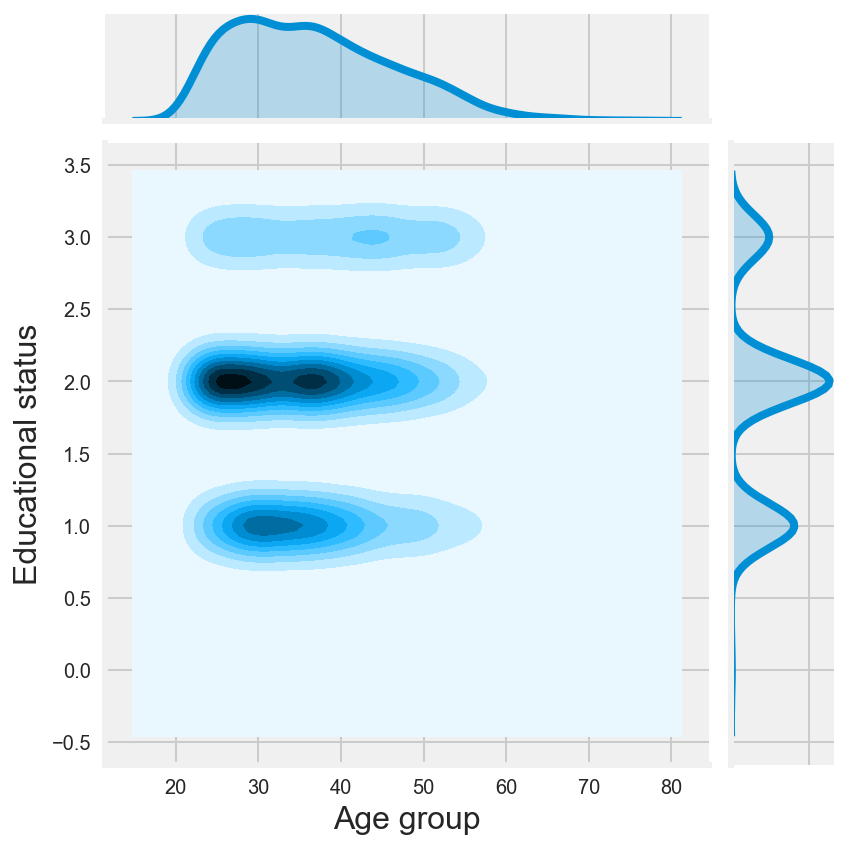

In [91]:
#DEFAULT MALE - EDUCATIONAL STATUS
test = default_table.loc[default_table['SEX']=='male']
g = sns.jointplot('AGE','Edu_list', data= test, kind = 'kde')
g.set_axis_labels('x', 'Educational status', fontsize=16)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Age group')

# also possible to manipulate the histogram plots this way, e.g.
g.ax_marg_y.grid('on') # with ugly consequences...

# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

INFERENCE

In age group 21 to 34, most of the men customers are single with the educational qualification of university. This is same to pattern found in female customers.

In age group 35 to 79, most of the male customers are married with the educational qualification of university

Male customers with high school educational qualification, tends to be more in default list as the age increases. They are quite high in the age 42 to 79. This also same to women’s trend

Male customers with graduate school educational qualification, tends to be more in default list as the age increases. They are quite high in the age 29 to 79. This is different from the women customer’s trend. 
